# HIRING MODEL

Hiring Model ipums@umn.edu Thu, Nov 28, 12:31 PM (2 days ago) to me Your Higher Ed extract is ready. To retrieve your data, codebook, and command files, go to the link below. Account: naeemahaz@gmail.com Extract: 2 Link: https://highered.ipums.org/highered-action/extract_requests/download Publications and research reports based on the Higher Ed database must cite it appropriately. The citation should include the following: Minnesota Population Center. IPUMS Higher Ed: Version 1.0 [dataset]. Minneapolis, MN: University of Minnesota, 2016. https://doi.org/10.18128/D100.V1.0 For policy briefs or articles in the popular press that use the Higher Ed database, we recommend that you cite the use of Higher Ed data as follows: Higher Ed, University of Minnesota, www.ipums.org Thank you for your support. Sincerely, The Higher Ed Team

In [2055]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)

In [2056]:
person = pd.read_csv('persondata.csv')
education = pd.read_csv('education.csv')
work = pd.read_csv('employnewdb.csv')

C:\Users\Naeemah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# PERSONAL

In [2057]:
person.head()

,REFID,YEAR,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN
0,20901QY86,2010,37,Male,No,Asian,Not in the US,No,None,One child
1,20902AN23,2013,44,Male,No,White,Not in the US,No,None,Two or more children
2,20902EJ96,2013,51,Male,No,Asian,United States,Yes,Born in US or US territories,None
3,20902KP93,2013,49,Female,No,White,Not in the US,Yes,By naturalization,None
4,20902TH37,2013,45,Male,Yes,Under-represented minorities,Not in the US,No,None,None


In [2058]:
person.columns

Index(['REFID', 'YEAR', 'AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN'], dtype='object')

In [2059]:
persondb = pd.DataFrame(person)

In [2060]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89682 entries, 0 to 89681
Data columns (total 10 columns):
REFID              89682 non-null object
YEAR               89682 non-null int64
AGE                89682 non-null int64
GENDER             89682 non-null object
MINORITY           89682 non-null object
RACE               89682 non-null object
BIRTH_PLACE        89682 non-null object
US_CITIZENSHIP     89682 non-null object
US_CITIZEN_TYPE    89682 non-null object
TOTAL_CHILDREN     89682 non-null object
dtypes: int64(2), object(8)
memory usage: 6.8+ MB


In [2061]:
person.describe()

,YEAR,AGE
count,89682.000000,89682.000000
mean,2011.635679,43.298733
std,1.493859,13.907259
min,2010.000000,23.000000
25%,2010.000000,30.000000
50%,2013.000000,41.000000
75%,2013.000000,55.000000
max,2013.000000,75.000000


In [2062]:
person.sample(5)

,REFID,YEAR,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN
434,2I000GE96,2013,33,Male,Yes,Under-represented minorities,United States,Yes,Born in US or US territories,One child
84677,500475381,2010,66,Female,Yes,Under-represented minorities,Not in the US,Yes,By naturalization,One child
57031,E11680048,2013,31,Male,No,Asian,Not in the US,No,None,One child
46732,E11497872,2013,31,Female,No,White,United States,Yes,Born in US or US territories,One child
34860,E11282001,2013,63,Female,No,White,United States,Yes,Born in US or US territories,None


There are 10 columns and 89682 records in the person dataset.  The dataset shows the information of a person.  The Gender, Race, Birthplace, US Status, Age and how many children.  

1) Is Race skew? 

2) Is Gender skew? 

3) Is Age skew? 

4) Is Citzen skew? 



In [2063]:
persondb['AGE'].mean()

43.298733302111906

In [2064]:
persondb['AGE'].min()

23

In [2065]:
persondb['AGE'].max()

75

In [2066]:
race = persondb.pivot_table(index=['RACE'], values=['REFID'], aggfunc='count')

In [2067]:
race

,REFID
RACE,
Asian,15626
Under-represented minorities,19699
White,54357


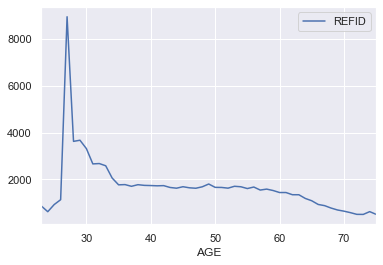

In [2068]:
age = persondb.pivot_table(index=['AGE'], values=['REFID'], aggfunc='count').plot()

In [2069]:
ustype = persondb.pivot_table(index=['US_CITIZEN_TYPE'], values=['REFID'], aggfunc='count')

In [2070]:
ustype

,REFID
US_CITIZEN_TYPE,
Born abroad of American parents,1238
Born in US or US territories,65901
By naturalization,13347
None,9196


In [2071]:
us = persondb.pivot_table(index=['US_CITIZENSHIP','GENDER','RACE'], values=['REFID'], aggfunc='count')

In [2072]:
us

REFID
US_CITIZENSHIP GENDER RACE                               
No             Female Asian                          2067
                      Under-represented minorities    571
                      White                           919
               Male   Asian                          3097
                      Under-represented minorities    943
                      White                          1599
Yes            Female Asian                          4570
                      Under-represented minorities   9813
                      White                         21644
               Male   Asian                          5892
                      Under-represented minorities   8372
                      White                         30195

In [2073]:
gender = persondb.pivot_table(index=['GENDER','RACE'], values=['REFID'], aggfunc='count')

In [2074]:
gender

REFID
GENDER RACE                               
Female Asian                          6637
       Under-represented minorities  10384
       White                         22563
Male   Asian                          8989
       Under-represented minorities   9315
       White                         31794

In [2075]:
kidsus = persondb.pivot_table(index=['US_CITIZEN_TYPE','TOTAL_CHILDREN'], values=['REFID'], aggfunc='count')

In [2076]:
kidsus

REFID
US_CITIZEN_TYPE                 TOTAL_CHILDREN             
Born abroad of American parents None                    702
                                One child               215
                                Two or more children    321
Born in US or US territories    None                  39797
                                One child             10563
                                Two or more children  15541
By naturalization               None                   6497
                                One child              2615
                                Two or more children   4235
None                            None                   5253
                                One child              1934
                                Two or more children   2009

In [2077]:
kidsus = persondb.pivot_table(index=['GENDER','TOTAL_CHILDREN'], values=['REFID'], aggfunc='count')

# GRAHPS

In [2078]:
#studyyear = person.groupby(['YEAR'])['REFID'].count()

#fig= plt.figure(figsize=(5,5))
#studyyear.plot(kind='bar')
#plt.show()

#personyear_count = person['YEAR'].value_counts()
#sns.set(style="darkgrid")
#sns.barplot(personyear_count.index, personyear_count.values, alpha=0.9)
#plt.title('Sample Years in Personal Dataset')
#plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('Sample Years', fontsize=12)
#plt.show()

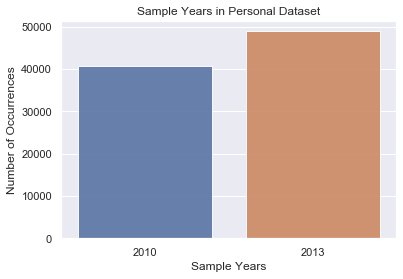

In [2079]:
personyear_count = person['YEAR'].value_counts()
sns.set(style="darkgrid")
sns.barplot(personyear_count.index, personyear_count.values, alpha=0.9)
plt.title('Sample Years in Personal Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sample Years', fontsize=12)
plt.show()

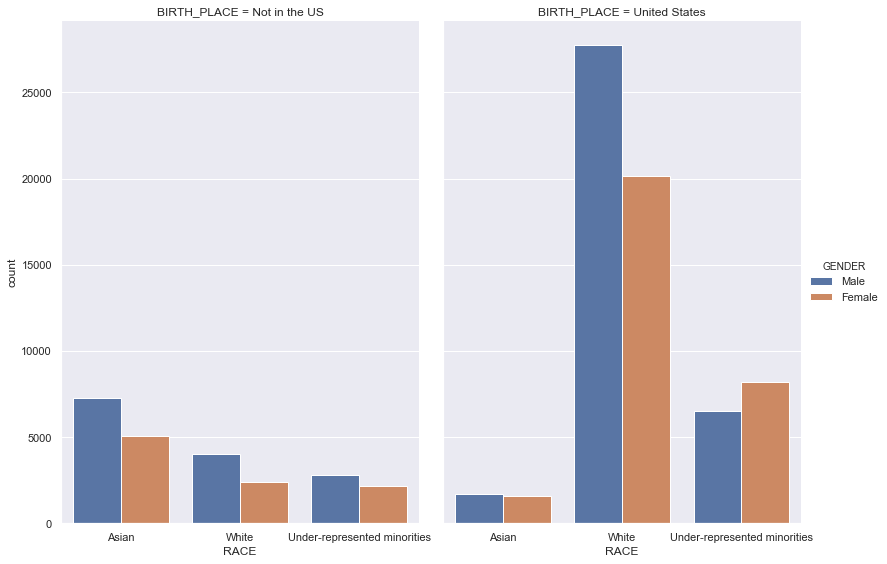

In [2080]:
race = sns.catplot(x="RACE", hue="GENDER", col="BIRTH_PLACE",
               data=person, kind="count",
               height=8, aspect=.7)

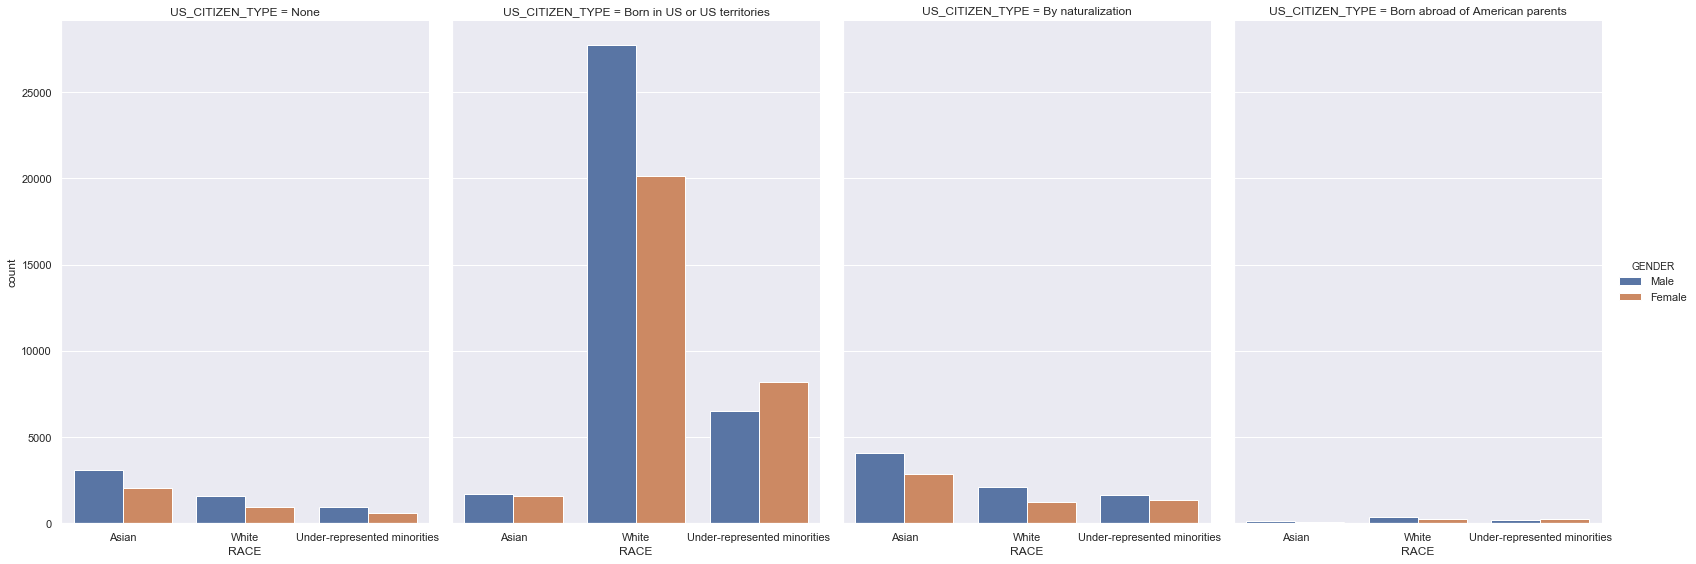

In [2081]:
ustype = sns.catplot(x="RACE", hue="GENDER", col="US_CITIZEN_TYPE",
               data=person, kind="count",
               height=8, aspect=.7)

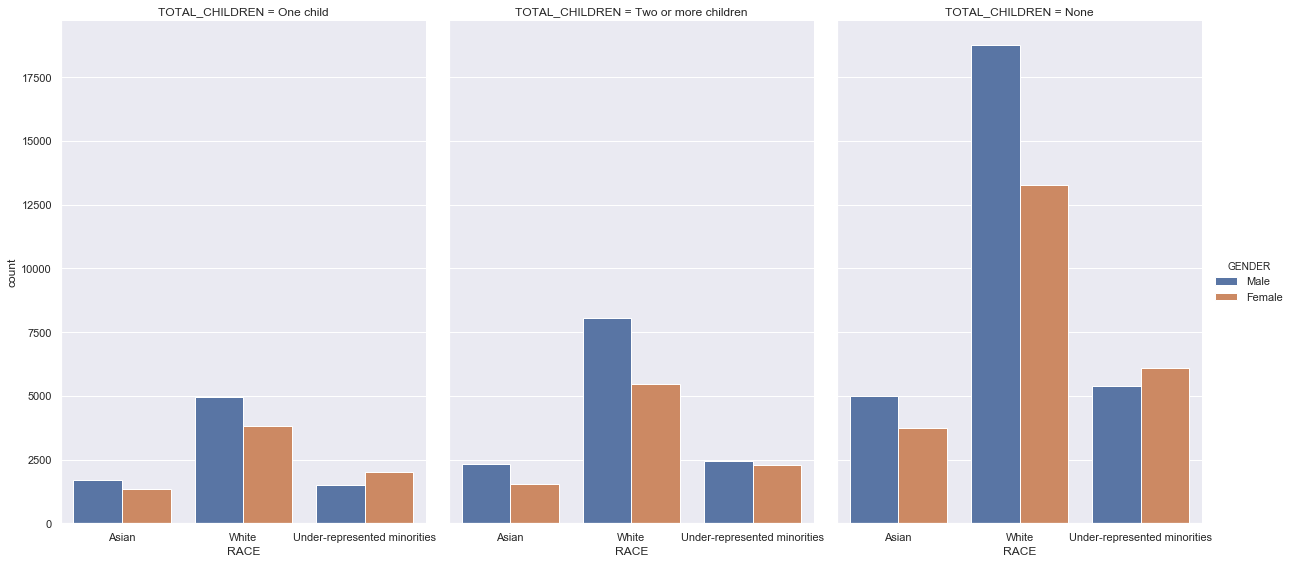

In [2082]:
kids = sns.catplot(x="RACE", hue="GENDER", col="TOTAL_CHILDREN",
               data=person, kind="count",
               height=8, aspect=.7)

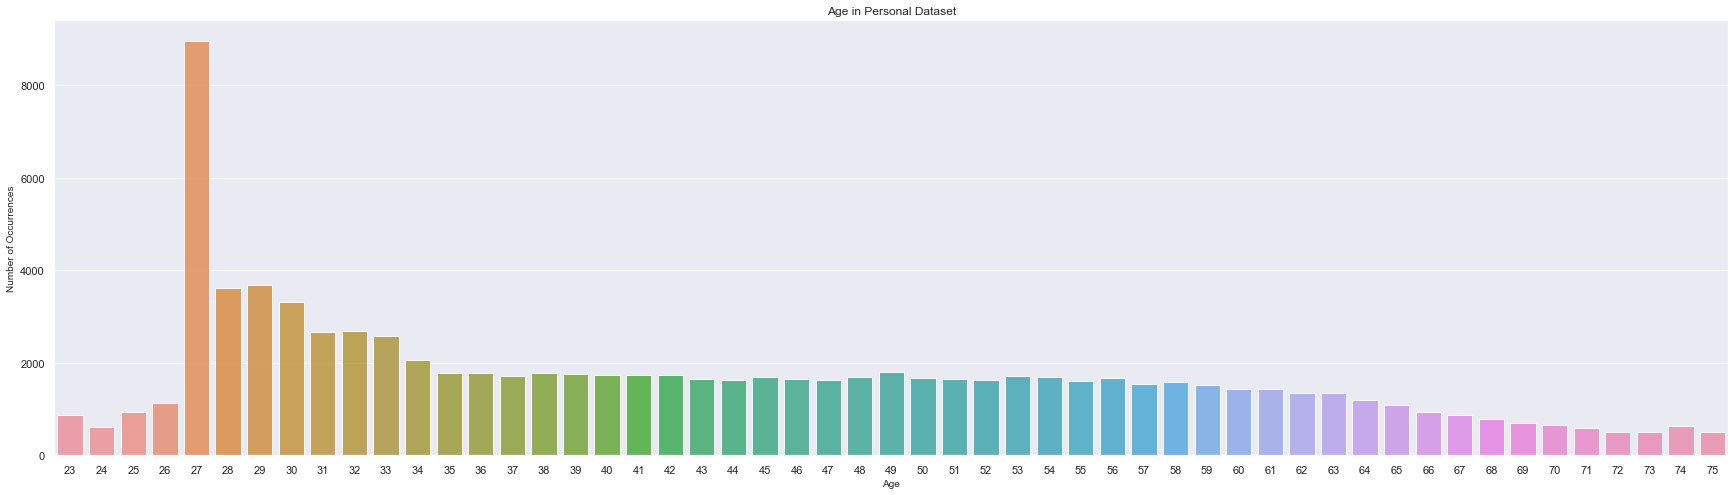

In [2083]:
AGE_count = person['AGE'].value_counts()

fig= plt.figure(figsize=(30,8))
sns.set(style="darkgrid")
sns.barplot(AGE_count.index, AGE_count.values, alpha=0.9)
plt.title('Age in Personal Dataset')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Age', fontsize=10)
plt.show()

In [2084]:
persondb.describe(include='all')

,REFID,YEAR,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN
count,89682,89682.000000,89682.000000,89682,89682,89682,89682,89682,89682,89682
unique,89682,NaN,NaN,2,2,3,2,2,4,3
top,E11399862,NaN,NaN,Male,No,White,United States,Yes,Born in US or US territories,None
freq,1,NaN,NaN,50098,69983,54357,65924,80486,65901,52249
mean,NaN,2011.635679,43.298733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.493859,13.907259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2010.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2085]:
persondb.columns

Index(['REFID', 'YEAR', 'AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN'], dtype='object')

In [2086]:
perdata = persondb[['REFID','AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN']]

# PERSONAL DATASET

# EDUCATION

What are the reasons for a person aquire an education?  

What are the fields? 

What are the reasons?

What is the degree? 


In [2087]:
education.head()

,Unnamed: 0,REFID,YEAR,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
0,0,500300006,2010,Engineering,Master,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",Master,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",None,No,No,No,No,No,No,No,No
1,1,500300014,2010,Social and related sciences,Master,Psychology,Social and related sciences,Master,Psychology,Social and related sciences,None,No,No,No,No,No,No,No,No
2,2,500300018,2010,Social and related sciences,Master,Other science and engineering-related,Science and engineering-related fields,Master,Other science and engineering-related,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
3,3,500300035,2010,Social and related sciences,Professional,Other non-science and engineering,Non-science and engineering fields,Professional,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
4,4,500300038,2010,Non-science and engineering fields,Master,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",Master,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",None,No,No,No,No,No,No,No,No


In [2088]:
edu = education

In [2089]:
edu = edu.drop(['Unnamed: 0'], axis=1)

In [2090]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89680 entries, 0 to 89679
Data columns (total 18 columns):
REFID                                      89680 non-null object
YEAR                                       89680 non-null int64
FIELD_MAJOR_GROUP_BACHELOR_DEGREE          86660 non-null object
HIGHEST_DEGREE                             89680 non-null object
FIELD_MAJOR_HIGHEST_DEGREE                 89680 non-null object
FIELD_MAJOR_GROUP_HIGHEST_DEGREE           89680 non-null object
RECENT_DEGREE                              89680 non-null object
FIELD_MAJOR_RECENT_DEGREE                  88198 non-null object
FIELD_MAJOR_GROUP_RECENT_DEGREE            89680 non-null object
STUDENT_STATUS                             89680 non-null object
REASON_EDUCATION_ADVANCE_OPPORTUNITIES     89680 non-null object
REASON_EDUCATION_BEFORE_CAREER             89680 non-null object
REASON_EDUCATION_CHANGE_CAREER             89680 non-null object
REASON_EDUCATION_PERSONAL                  8968

In [2091]:
edu.sample(10)

,REFID,YEAR,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
6946,500367541,2010,Science and engineering-related fields,Bachelor,Health-related fields,Science and engineering-related fields,Bachelor,Health-related fields,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
28620,B10115189,2010,Social and related sciences,Master,Other social sciences,Social and related sciences,Master,Other social sciences,Social and related sciences,None,No,No,No,No,No,No,No,No
28333,B10093751,2010,Engineering,Master,Civil engineering,Engineering,Master,Civil engineering,Engineering,None,No,No,No,No,No,No,No,No
41122,D09245448,2013,"Biological, agricultural and environmental lif...",Master,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",Master,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",None,No,No,No,No,No,No,No,No
82132,E11724622,2013,Non-science and engineering fields,Bachelor,Other non-science and engineering,Non-science and engineering fields,Bachelor,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
70983,E11531662,2013,Engineering,Bachelor,Mechanical engineering,Engineering,Bachelor,Mechanical engineering,Engineering,None,No,No,No,No,No,No,No,No
52785,E11196938,2013,Social and related sciences,Master,Other science and engineering-related,Science and engineering-related fields,Master,Other science and engineering-related,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
25992,A06503122,2010,Engineering,Master,Computer and mathematical science,Computer and mathematical sciences,Master,Computer and mathematical science,Computer and mathematical sciences,None,No,No,No,No,No,No,No,No
12158,500412218,2010,Non-science and engineering fields,Bachelor,Other non-science and engineering,Non-science and engineering fields,Bachelor,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
18806,500474842,2010,Social and related sciences,Master,Other non-science and engineering,Non-science and engineering fields,Master,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No


In [2092]:
edu.columns

Index(['REFID', 'YEAR', 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE', 'HIGHEST_DEGREE', 'FIELD_MAJOR_HIGHEST_DEGREE', 'FIELD_MAJOR_GROUP_HIGHEST_DEGREE', 'RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'STUDENT_STATUS', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER'], dtype='object')

In [2093]:
edu['FIELD_MAJOR_GROUP_BACHELOR_DEGREE'].fillna("No")

0                                              Engineering
1                              Social and related sciences
2                              Social and related sciences
3                              Social and related sciences
4                       Non-science and engineering fields
5                       Computer and mathematical sciences
6        Biological, agricultural and environmental lif...
7                                              Engineering
8                       Non-science and engineering fields
9                                              Engineering
10       Biological, agricultural and environmental lif...
11                             Social and related sciences
12       Biological, agricultural and environmental lif...
13                  Science and engineering-related fields
14                             Social and related sciences
15                      Computer and mathematical sciences
16                  Science and engineering-related fiel

In [2094]:
edu.columns

Index(['REFID', 'YEAR', 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE', 'HIGHEST_DEGREE', 'FIELD_MAJOR_HIGHEST_DEGREE', 'FIELD_MAJOR_GROUP_HIGHEST_DEGREE', 'RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'STUDENT_STATUS', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER'], dtype='object')

In [2095]:
edudb = pd.DataFrame(edu)

In [2096]:
edudata = edudb[['REFID', 'YEAR','RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'STUDENT_STATUS', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER']]

In [2097]:
edudata.sample(10)

,REFID,YEAR,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
6666,500364670,2010,Doctorate,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
68276,E11483047,2013,Master,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
6802,500365903,2010,Bachelor,Economics,Social and related sciences,None,No,No,No,No,No,No,No,No
4462,500342256,2010,Bachelor,Mechanical engineering,Engineering,None,No,No,No,No,No,No,No,No
70511,E11523628,2013,Bachelor,Computer and mathematical science,Computer and mathematical sciences,None,No,No,No,No,No,No,No,No
88447,2I925FY79,2010,No Degree,"Other biological, agricultural, environmental ...","Biological, agricultural and environmental lif...",None,No,No,No,No,No,No,No,No
86726,E11805256,2013,Master,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
68878,E11493996,2013,Master,Management and administration,Non-science and engineering fields,None,No,No,No,No,No,No,No,No
74778,E11597853,2013,Master,Health-related fields,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
33716,D09334614,2010,Bachelor,Biological sciences,"Biological, agricultural and environmental lif...",None,No,No,No,No,No,No,No,No


In [2098]:
recentdegree= edudata.pivot_table(index=['RECENT_DEGREE'], values=['REFID'], aggfunc='count')

In [2099]:
recentdegree

,REFID
RECENT_DEGREE,
Bachelor,48504
Doctorate,3040
Master,31850
No Degree,1471
Professional,4815


In [2100]:
reasonsdegree = edudata[['RECENT_DEGREE','REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER']]

In [2101]:
reasonsdegree.sample(10)

,RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
22766,Bachelor,No,No,No,No,No,No,No,No
23123,Master,No,No,No,No,No,No,No,No
71873,Master,No,No,No,No,No,No,No,No
44625,Master,No,No,No,No,No,No,No,No
17638,Master,No,No,No,No,No,No,No,No
33834,Bachelor,No,Yes,No,No,No,Yes,Yes,No
2836,Bachelor,No,No,No,No,No,No,No,No
18316,Bachelor,No,No,No,No,No,No,No,No
20641,Master,No,No,No,No,No,No,No,No
58835,Master,No,No,No,No,No,No,No,No


In [2102]:
reasonedu = edudata.pivot_table(index=['REASON_EDUCATION_ADVANCE_OPPORTUNITIES'], values=['REFID'], aggfunc='count')

In [2103]:
reasonedu

,REFID
REASON_EDUCATION_ADVANCE_OPPORTUNITIES,
No,83111
Yes,6569


In [2104]:
reasonbeforecareer = edudata.pivot_table(index=['REASON_EDUCATION_BEFORE_CAREER'], values=['REFID'], aggfunc='count')

In [2105]:
reasonbeforecareer

,REFID
REASON_EDUCATION_BEFORE_CAREER,
No,83681
Yes,5999


In [2106]:
reasonchange = edudata.pivot_table(index=['REASON_EDUCATION_CHANGE_CAREER'], values=['REFID'], aggfunc='count')

In [2107]:
reasonchange

,REFID
REASON_EDUCATION_CHANGE_CAREER,
No,86649
Yes,3031


In [2108]:
reasonper = edudata.pivot_table(index=['REASON_EDUCATION_PERSONAL'], values=['REFID'], aggfunc='count')

In [2109]:
reasonper

,REFID
REASON_EDUCATION_PERSONAL,
No,85680
Yes,4000


In [2110]:
reasoncert = edudata.pivot_table(index=['REASON_EDUCATION_PERSONAL'], values=['REFID'], aggfunc='count')

In [2111]:
reasoncert

,REFID
REASON_EDUCATION_PERSONAL,
No,85680
Yes,4000


In [2112]:
reasonemp = edudata.pivot_table(index=['REASON_EDUCATION_BY_EMPLOYER'], values=['REFID'], aggfunc='count')

In [2113]:
reasonemp

,REFID
REASON_EDUCATION_BY_EMPLOYER,
No,85609
Yes,4071


In [2114]:
reasonskill = edudata.pivot_table(index=['REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD'], values=['REFID'], aggfunc='count')

In [2115]:
reasonskill

,REFID
REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,
No,82446
Yes,7234


In [2116]:
reasonpaidemp = edudb.pivot_table(index=['REASON_EDUCATION_PAID_BY_EMPLOYER'], values=['REFID'], aggfunc='count')

In [2117]:
reasonpaidemp

,REFID
REASON_EDUCATION_PAID_BY_EMPLOYER,
No,85940
Yes,3740


# GRAPHS

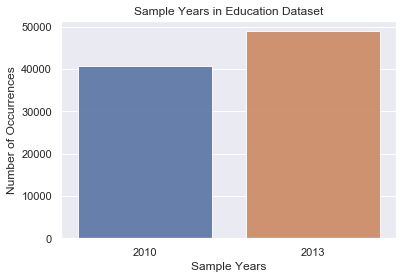

In [2118]:
eduyear_count = edudata['YEAR'].value_counts()
sns.set(style="darkgrid")
sns.barplot(eduyear_count.index, eduyear_count.values, alpha=0.9)
plt.title('Sample Years in Education Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sample Years', fontsize=12)
plt.show()

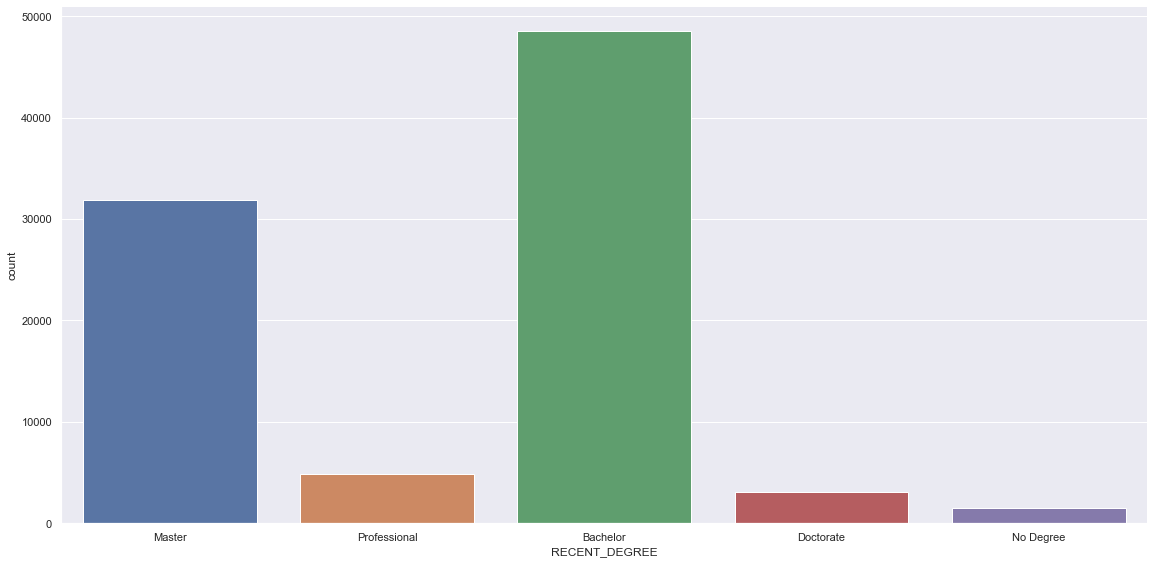

In [2119]:
degreeme = sns.catplot(x="RECENT_DEGREE",
               data=edudata, kind="count",
               height=8, aspect=2)

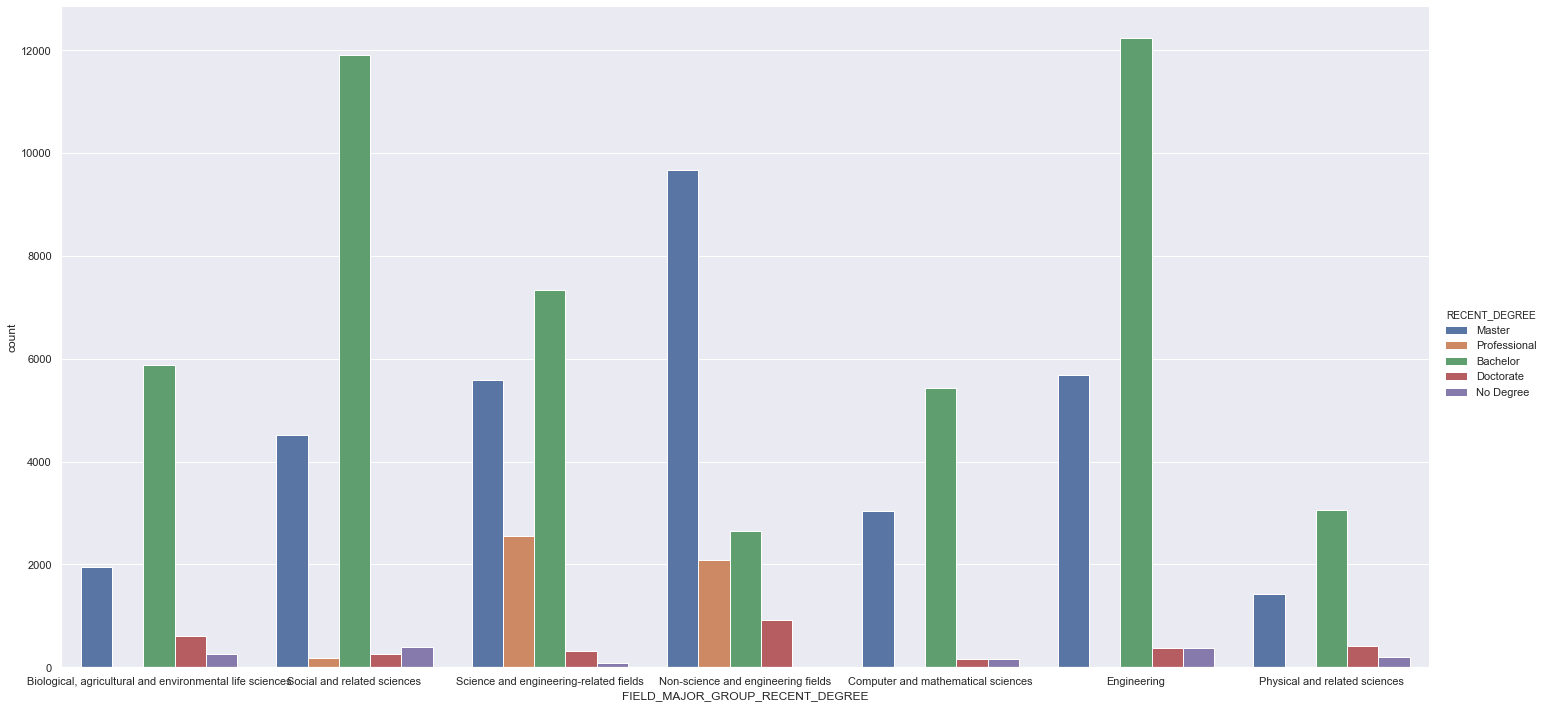

In [2120]:
degreeme = sns.catplot(x="FIELD_MAJOR_GROUP_RECENT_DEGREE", hue="RECENT_DEGREE",
               data=edudata, kind="count",
               height=10, aspect=2)

In [2121]:
edudata.describe(include='all')

,REFID,YEAR,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
count,89680,89680.000000,89680,88198,89680,89680,89680,89680,89680,89680,89680,89680,89680,89680
unique,89680,NaN,5,19,7,4,2,2,2,2,2,2,2,2
top,E11399862,NaN,Bachelor,Health-related fields,Engineering,None,No,No,No,No,No,No,No,No
freq,1,NaN,48504,11692,18646,80074,83111,83681,86649,85680,86465,85609,82446,85940
mean,NaN,2011.635682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.493859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2122]:
#reasonme = edu.groupby(['REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER'])

In [2123]:
reason = edu.groupby(['REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER','REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL'])['REFID'].count()

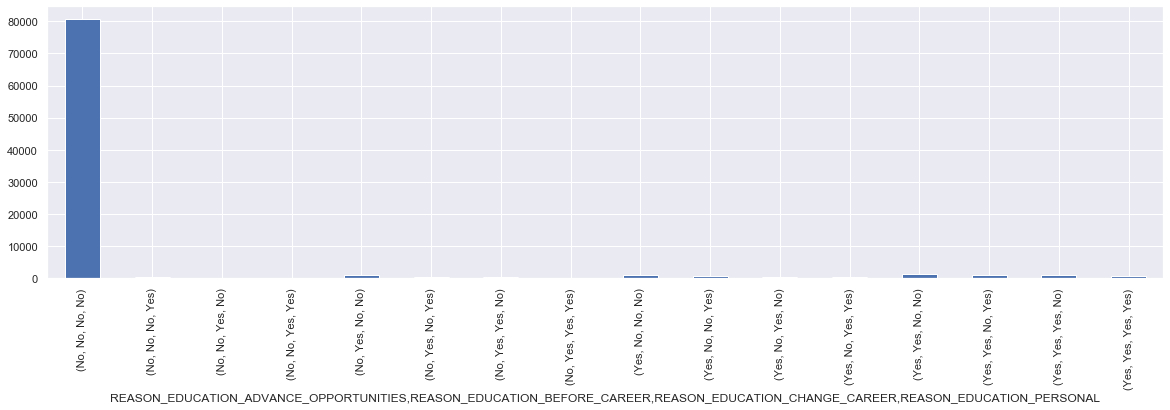

In [2124]:
fig= plt.figure(figsize=(20,5))
reason.plot(kind='bar')
plt.show()

In [2125]:
reas = edu[['REFID','REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER','REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL']]

In [2126]:
reasonnow = edudata.pivot_table(index=['REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER','REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL'], values=['REFID'], aggfunc='count')

In [2127]:
reasonnow

REFID
REASON_EDUCATION_ADVANCE_OPPORTUNITIES REASON_EDUCATION_BEFORE_CAREER REASON_EDUCATION_CHANGE_CAREER REASON_EDUCATION_PERSONAL       
No                                     No                             No                             No                         80626
                                                                                                     Yes                          492
                                                                      Yes                            No                           188
                                                                                                     Yes                           73
                                       Yes                            No                             No                           884
                                                                                                     Yes                          317
                                                                      Yes                            No                           335
                                                                                                     Yes                          196
Yes                                    No                             No                             No                          1042
                                                                                                     Yes                          723
                                                                      Yes                            No                           303
                                                                                                     Yes                          234
                                       Yes                            No                             No                          1412
                                                                                                     Yes                         1153
                                                                      Yes                            No                           890
                                                                                                     Yes                          812

In [2128]:
reasonnow.transpose()

REASON_EDUCATION_ADVANCE_OPPORTUNITIES     No                                     Yes                                     
REASON_EDUCATION_BEFORE_CAREER             No                Yes                   No                  Yes                
REASON_EDUCATION_CHANGE_CAREER             No       Yes       No       Yes         No       Yes         No        Yes     
REASON_EDUCATION_PERSONAL                  No  Yes   No Yes   No  Yes   No  Yes    No  Yes   No  Yes    No   Yes   No  Yes
REFID                                   80626  492  188  73  884  317  335  196  1042  723  303  234  1412  1153  890  812

In [2129]:
reasonfor = edudata[['REFID','REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER','REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL']]

In [2130]:
reasonfor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89680 entries, 0 to 89679
Data columns (total 5 columns):
REFID                                     89680 non-null object
REASON_EDUCATION_ADVANCE_OPPORTUNITIES    89680 non-null object
REASON_EDUCATION_BEFORE_CAREER            89680 non-null object
REASON_EDUCATION_CHANGE_CAREER            89680 non-null object
REASON_EDUCATION_PERSONAL                 89680 non-null object
dtypes: object(5)
memory usage: 3.4+ MB


In [2131]:
edudata.columns

Index(['REFID', 'YEAR', 'RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'STUDENT_STATUS', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER'], dtype='object')

In [2132]:
edudbnew = edudata[['REFID','RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE','REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER']]

# EMPLOYMENT

1) What do an employee look for in a company? 

2) What makes an empployee happy to work for a company? 

3) Do employees use their degrees?  

4) Can an employee without a degree can work? 

5) Does a degree aglin with the type of company? 



In [2133]:
work.sample(10)

,REFID,YEAR,LABOR_STATUS,HOURS_WORKED,WEEKS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,LOOKING_FOR_WORK,PARTTIME_BUT_WANT_FULLTIME,PARTTIME_FOR_FAMILY,PARTTIME_NOT_WANT,PARTTIME_NO_FULLTIME,PARTTIME_OTHER,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,SALARY,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,NOT_WORKING_LAYOFF,NOT_WORKING_NO_NEED_TO_WORK,NOT_WORKING_NO_JOB,NOT_WORKING_SICK,NOT_WORKING_STUDENT
70724,E11527231,2013,Not in the labor force,None,None,No,No,No,No,No,No,No,No,No,No,No,None,None,Other,None,No,No,No,No,No,No,No,No,No,No,No,No,No Secondary Activity,No Secondary Activity,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No memberships,No,"$9,999,998.00",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Other,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
75138,E11604501,2013,Employed,21 - 35 hours,40-52 weeks,No,No,No,No,No,No,Yes,No,No,No,Closely related,Health-related occupations,Science and engineering related occupations,Business or industry,5000-24999 employees,No,No,No,No,No,No,No,No,No,No,Professional services,Other,No Secondary Activity,No Secondary Activity,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No memberships,No,"$48,000.00",No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,No,Other,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No
8646,500382396,2010,Not in the labor force,None,None,No,No,No,No,No,No,No,No,No,No,No,None,None,Other,None,No,No,No,No,No,No,No,No,No,No,No,No,No Secondary Activity,No Secondary Activity,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No memberships,No,"$9,999,998.00",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Other,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No
73396,E11573888,2013,Employed,Greater than 40 hours,40-52 weeks,Yes,Yes,Yes,Yes,No,No,No,No,No,No,Closely related,Other management related occupations,Non-science and engineering occupations,Business or industry,5000-24999 employees,No,No,No,No,No,No,No,No,No,No,Management and Administration,Management and Administration,"Accounting, finance, contracts",Management and Administration,No,No,Yes,No,No,No,No,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,Yes,No,No,No,No,No memberships

In [2134]:
employ = work

In [2135]:
employ.columns

Index(['REFID', 'YEAR', 'LABOR_STATUS', 'HOURS_WORKED', 'WEEKS_WORKED', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'LOOKING_FOR_WORK', 'PARTTIME_BUT_WANT_FULLTIME', 'PARTTIME_FOR_FAMILY', 'PARTTIME_NOT_WANT', 'PARTTIME_NO_FULLTIME', 'PARTTIME_OTHER', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'EMPLOYER_NEW_BUSINESS', 'EMPLOYER_GOVERNMENT', 'EMPLOYER_EDUCATION', 'EMPLOYER_FEDERAL_SUPPORT', 'EMPLOYER_DEFENSE', 'EMPLOYER_ENERGY', 'FEDERAL_HEALTH_SERVICES', 'FEDERAL_NIH', 'FEDERAL_NSF', 'FEDERAL_OTHER', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
       'WORK_QUALI

In [2136]:
notworking = employ.pivot_table(index=['NOT_WORKING_LAYOFF','NOT_WORKING_NO_NEED_TO_WORK','NOT_WORKING_NO_JOB','NOT_WORKING_SICK','NOT_WORKING_STUDENT'], values=['REFID'], aggfunc='count')

In [2137]:
notworking.transpose()

NOT_WORKING_LAYOFF              No                                                                           Yes                                                      
NOT_WORKING_NO_NEED_TO_WORK     No                                      Yes                                   No                               Yes                    
NOT_WORKING_NO_JOB              No                   Yes                 No                 Yes               No               Yes              No         Yes        
NOT_WORKING_SICK                No         Yes        No       Yes       No        Yes       No     Yes       No      Yes       No     Yes      No     Yes  No     Yes
NOT_WORKING_STUDENT             No   Yes    No Yes    No  Yes   No Yes   No  Yes    No Yes   No Yes  No Yes   No Yes   No Yes   No Yes  No Yes  No Yes  No  No Yes  No
REFID                        76245  1406  5766  57  1009  188  330  22  988  245  1445  20  103  36  82   4  839  37  105   3  509  44  93   3  22   3  19  22   5  30

In [2138]:
notworkingme = employ.groupby(['NOT_WORKING_LAYOFF','NOT_WORKING_NO_NEED_TO_WORK','NOT_WORKING_NO_JOB','NOT_WORKING_SICK','NOT_WORKING_STUDENT'])['REFID'].count()

In [2139]:
employ.columns


Index(['REFID', 'YEAR', 'LABOR_STATUS', 'HOURS_WORKED', 'WEEKS_WORKED', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'LOOKING_FOR_WORK', 'PARTTIME_BUT_WANT_FULLTIME', 'PARTTIME_FOR_FAMILY', 'PARTTIME_NOT_WANT', 'PARTTIME_NO_FULLTIME', 'PARTTIME_OTHER', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'EMPLOYER_NEW_BUSINESS', 'EMPLOYER_GOVERNMENT', 'EMPLOYER_EDUCATION', 'EMPLOYER_FEDERAL_SUPPORT', 'EMPLOYER_DEFENSE', 'EMPLOYER_ENERGY', 'FEDERAL_HEALTH_SERVICES', 'FEDERAL_NIH', 'FEDERAL_NSF', 'FEDERAL_OTHER', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
       'WORK_QUALI

In [2140]:
havesta = employ[['REFID','HOURS_WORKED', ' SALARY ','HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION','SATISFACTION_JOB', 'SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS', 'SATISFACTION_JOB_CHALLENGE', 'SATISFACTION_JOB_INDEP', 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY', 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY']]

In [2141]:
havesta.sample(10)

,REFID,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY
1127,500310426,20 or less,"$45,000.00",Yes,No,No,No,Very satisfied,Very dissatisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied
4892,500346053,36 - 40 hours,"$106,000.00",Yes,Yes,Yes,Yes,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied
35576,D09506096,None,"$9,999,998.00",No,No,No,No,No,No,No,No,No,No,No,No,No,No
9955,500393372,21 - 35 hours,"$142,000.00",Yes,Yes,No,Yes,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied,Very dissatisfied,Somewhat dissatisfied,Very dissatisfied,Very satisfied,Very satisfied,Somewhat satisfied
47423,E11096625,Greater than 40 hours,"$98,000.00",Yes,Yes,Yes,Yes,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied
86861,E11807872,Greater than 40 hours,"$68,000.00",Yes,Yes,No,Yes,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied
27637,B10040131,Greater than 40 hours,"$42,000.00",Yes,Yes,No,Yes,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat dissatisfied,Very dissatisfied,Very satisfied,Very satisfied
65544,E11433059,36 - 40 hours,"$119,000.00",Yes,Yes,No,Yes,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied
20195,500487040,36 - 40 hours,"$150,000.00",Yes,Yes,Yes,Yes,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied
23504,977763497,Greater than 40 hours,"$84,000.00",Yes,Yes,No,Yes,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied


In [2142]:
havestaworking = havesta[havesta.HOURS_WORKED != "None"]

In [2143]:
havestaworking.sample(10)

,REFID,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY
70852,E11529138,21 - 35 hours,"$150,000.00",Yes,Yes,Yes,No,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied
29289,B10163791,36 - 40 hours,"$50,000.00",Yes,Yes,No,No,Very dissatisfied,Very dissatisfied,Very dissatisfied,Very satisfied,Very satisfied,Very dissatisfied,Somewhat satisfied,Very dissatisfied,Very dissatisfied,Somewhat satisfied
56381,E11265220,21 - 35 hours,"$35,000.00",Yes,No,No,Yes,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat dissatisfied,Somewhat satisfied,Very satisfied
2780,500328047,Greater than 40 hours,"$100,000.00",Yes,Yes,Yes,Yes,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied
12042,500411011,Greater than 40 hours,"$43,000.00",Yes,Yes,No,Yes,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied
52623,E11193612,Greater than 40 hours,"$125,000.00",Yes,Yes,Yes,Yes,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat dissatisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied
41072,D09229426,21 - 35 hours,"$60,000.00",Yes,Yes,Yes,Yes,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied
39973,C10209820,36 - 40 hours,"$21,000.00",Yes,No,No,Yes,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat dissatisfied,Somewhat satisfied,Very satisfied
27101,A06590996,Greater than 40 hours,"$68,000.00",Yes,Yes,Yes,Yes,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied
76440,E11627270,36 - 40 hours,"$20,000.00",No,No,No,No,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied


In [2144]:
employ.columns

Index(['REFID', 'YEAR', 'LABOR_STATUS', 'HOURS_WORKED', 'WEEKS_WORKED', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'LOOKING_FOR_WORK', 'PARTTIME_BUT_WANT_FULLTIME', 'PARTTIME_FOR_FAMILY', 'PARTTIME_NOT_WANT', 'PARTTIME_NO_FULLTIME', 'PARTTIME_OTHER', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'EMPLOYER_NEW_BUSINESS', 'EMPLOYER_GOVERNMENT', 'EMPLOYER_EDUCATION', 'EMPLOYER_FEDERAL_SUPPORT', 'EMPLOYER_DEFENSE', 'EMPLOYER_ENERGY', 'FEDERAL_HEALTH_SERVICES', 'FEDERAL_NIH', 'FEDERAL_NSF', 'FEDERAL_OTHER', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
       'WORK_QUALI

In [2145]:
working = employ[['REFID', 'YEAR','HOURS_WORKED',' SALARY ','HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION','PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'EMPLOYER_NEW_BUSINESS', 'EMPLOYER_GOVERNMENT', 'EMPLOYER_EDUCATION', 'EMPLOYER_FEDERAL_SUPPORT', 'EMPLOYER_DEFENSE', 'EMPLOYER_ENERGY', 'FEDERAL_HEALTH_SERVICES', 'FEDERAL_NIH', 'FEDERAL_NSF', 'FEDERAL_OTHER', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
       'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',  'WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON', 'WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON', 'WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE', 'WORK_OUTSIDE_DEGREE_FOR_WORK_COND', 'WORK_OUTSIDE_DEGREE_FOR_FAMILY', 'WORK_OUTSIDE_DEGREE_FOR_LOC', 'WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL', 'WORK_OUTSIDE_DEGREE_FOR_OTHER', 'WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE', 'SATISFACTION_JOB', 'SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS', 'SATISFACTION_JOB_CHALLENGE', 'SATISFACTION_JOB_INDEP', 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY', 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY', 'ATTEND_TRAINING_WORK_RELATE', 'ATTEND_TRAINING', 'ATTEND_TRAINING_CHANGE_FIELD', 'ATTEND_TRAINING_BY_EMPLOYER',
       'ATTEND_TRAINING_CERT', 'ATTEND_TRAINING_INCREASE_ADV_CUR', 'ATTEND_TRAINING_OTHER', 'ATTEND_TRAINING_PERSONAL', 'ATTEND_TRAINING_ACQUIRE_SKILL', 'JOB_REQUIRED_TECH_NATURAL_SCIENCES', 'JOB_REQUIRED_TECH_OTHER', 'JOB_REQUIRED_TECH_SOCIAL_SCIENCES']]

In [2146]:
working = working[working.HOURS_WORKED != "None"]

In [2147]:
working.sample(6)

,REFID,YEAR,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES
29747,B10199600,2010,Greater than 40 hours,"$50,000.00",Yes,Yes,No,Yes,Closely related,Psychologists,Social and related scientists,4 year college or medical institution,5000-24999 employees,No,No,No,No,No,No,No,No,No,No,Basic research,Research and Development,Management and Administration,Management and Administration,No,No,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,2 memberships,Yes,No,No,No,No,No,No,No,No,No,Very satisfied,Somewhat dissatisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat dissatisfied,Very satisfied,Yes,To facilitate a change in occupation field,No,No,No,No,No,Yes,Yes,No,No,Yes
29055,B10146828,2010,20 or less,"$20,000.00",No,No,No,No,Closely related,Other engineers,Engineers,4 year college or medical institution,5000-24999 employees,No,No,No,No,No,No,No,No,No,No,Basic research,Research and Development,"Design of equipment, processes, structures, mo...",Computer Applications,Yes,No,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,1 membership,No,No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,No,Other,No,No,No,No,No,No,No,Yes,No,No
1591,500315756,2010,36 - 40 hours,"$55,000.00",Yes,No,Yes,Yes,Closely related,Electrical or computer hardware engineers,Engineers,Business or industry,11-24 employees,No,No,No,No,No,No,No,No,No,No,"Computer applications, programming, systems de...",Research and Development,"Sales, purchasing, marketing",Management and Administration,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No memberships,No,No,No,No,No,No,No,No,No,No,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,No,Other,No,No,No,No,No,No,No,Yes,No,No
19634,500482445,2010,36 - 40 hours,"$150,000.00",No,No,No,No,Closely related,Health-related occupations,Science and engineering related occupations,Business or industry,10 or fewer e

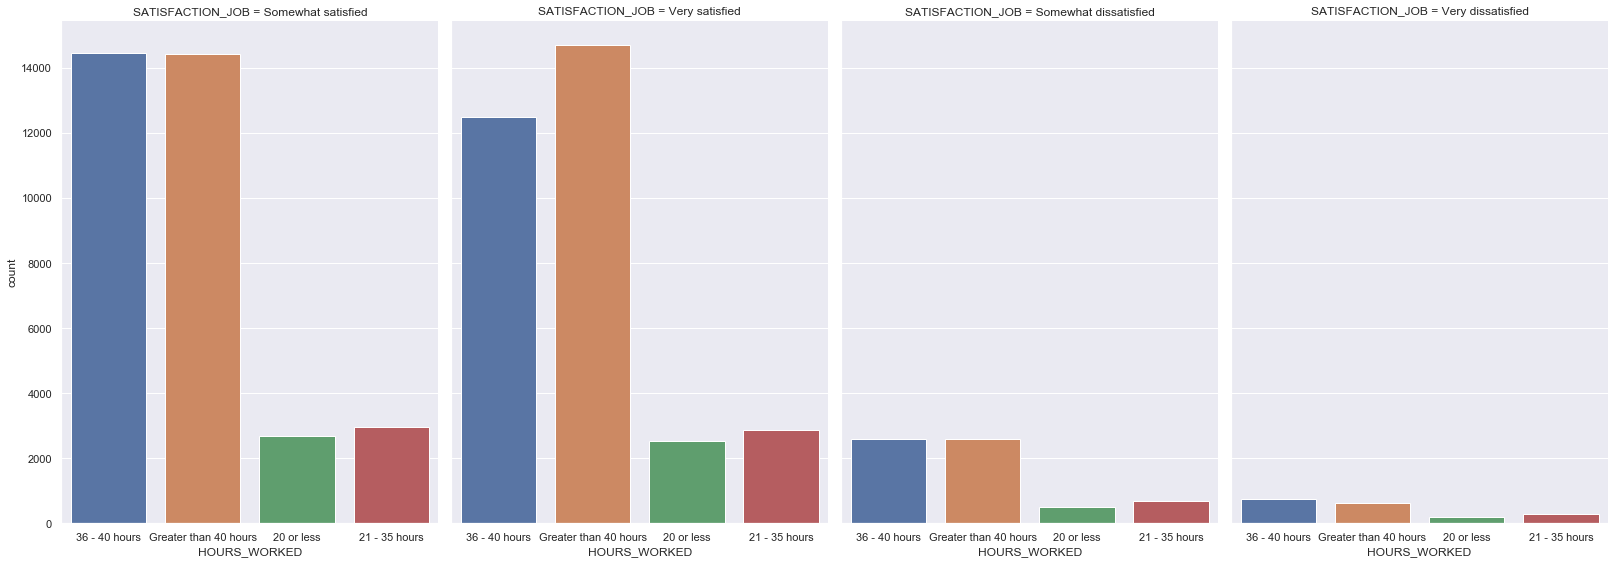

In [2148]:
hours = sns.catplot(x="HOURS_WORKED",  col="SATISFACTION_JOB",
               data=working, kind="count",
               height=8, aspect=.7)

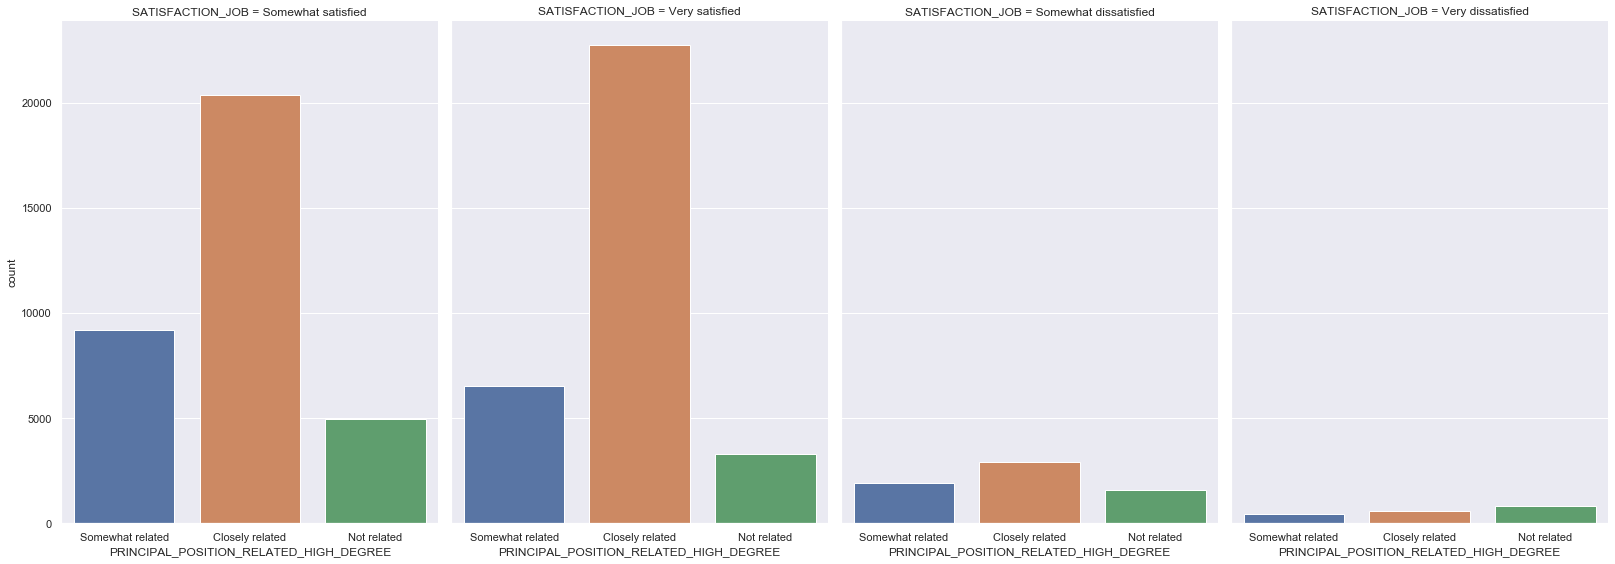

In [2149]:
degree = sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="SATISFACTION_JOB",
               data=working, kind="count",
               height=8, aspect=.7)

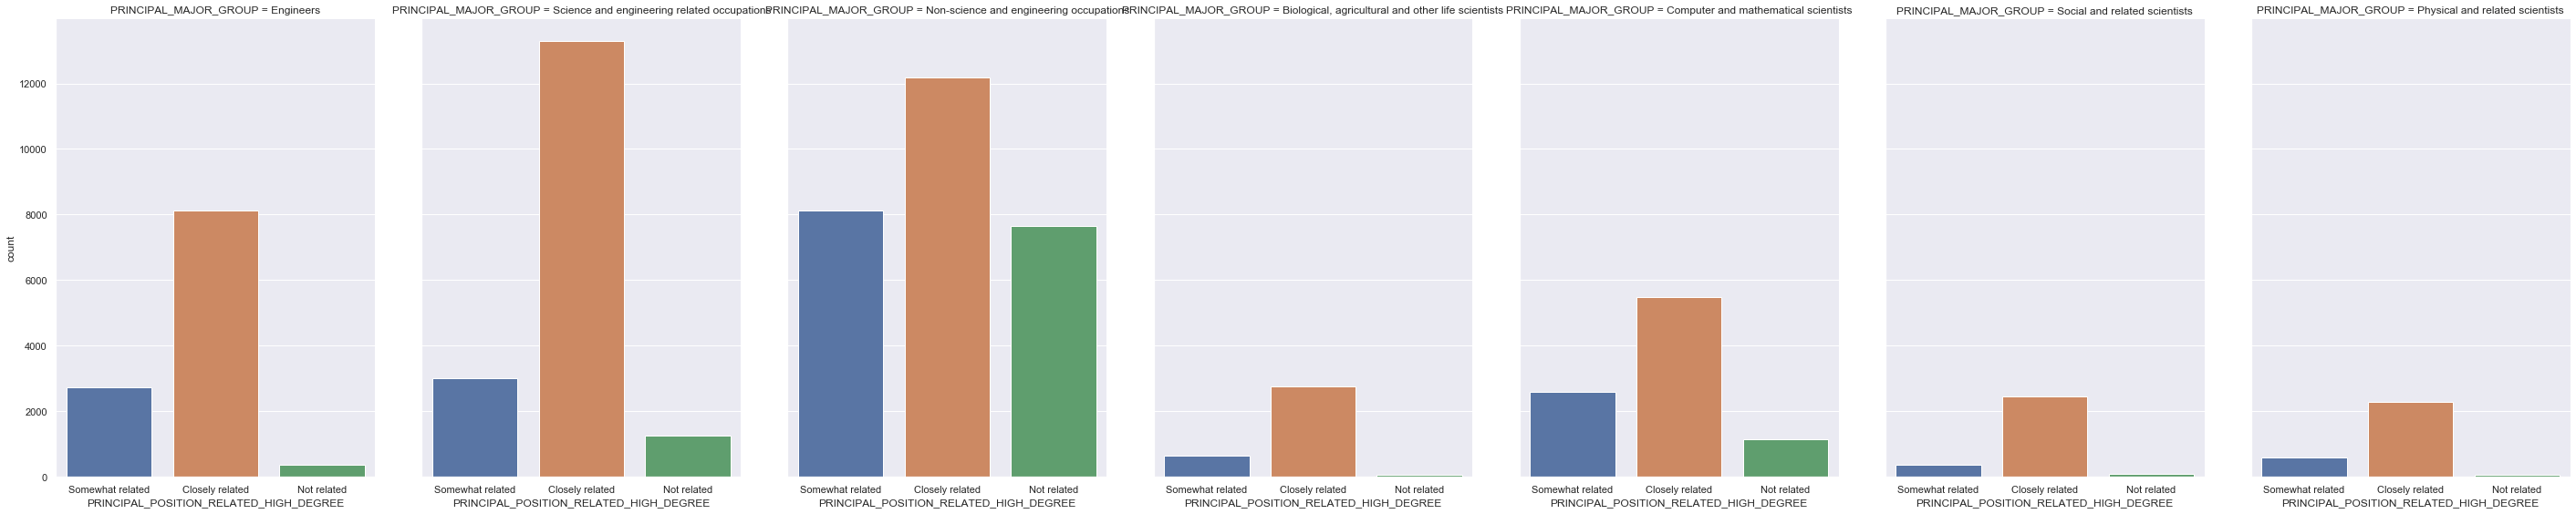

In [2150]:
majorjob = sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="PRINCIPAL_MAJOR_GROUP",
               data=working, kind="count",
               height=8, aspect=.7)

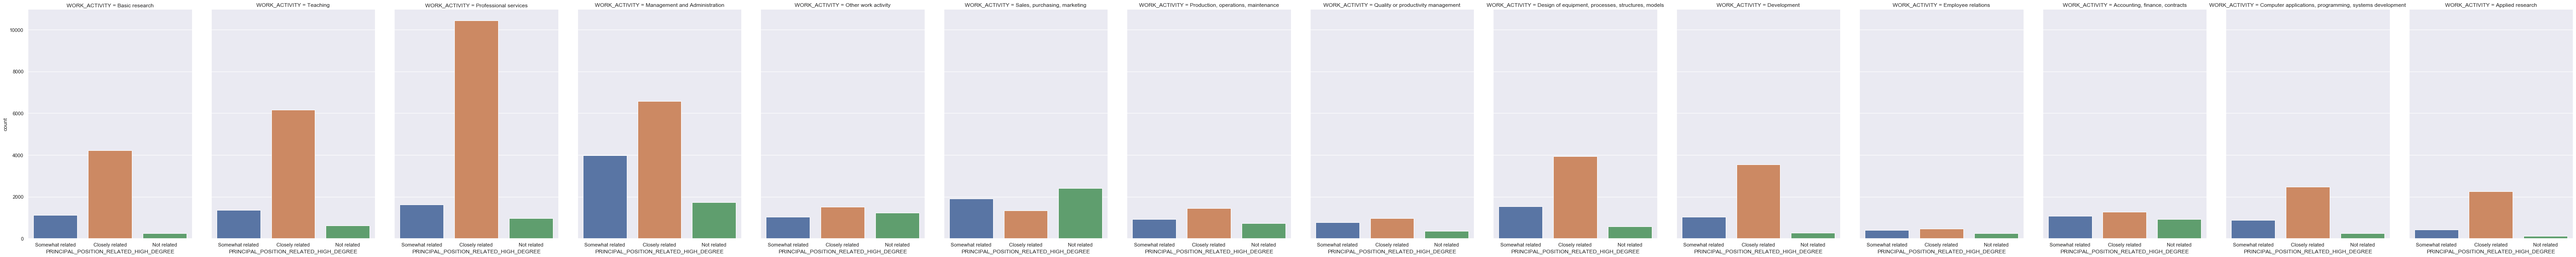

In [2151]:
workact = sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="WORK_ACTIVITY",
               data=working, kind="count",
               height=8, aspect=.7)

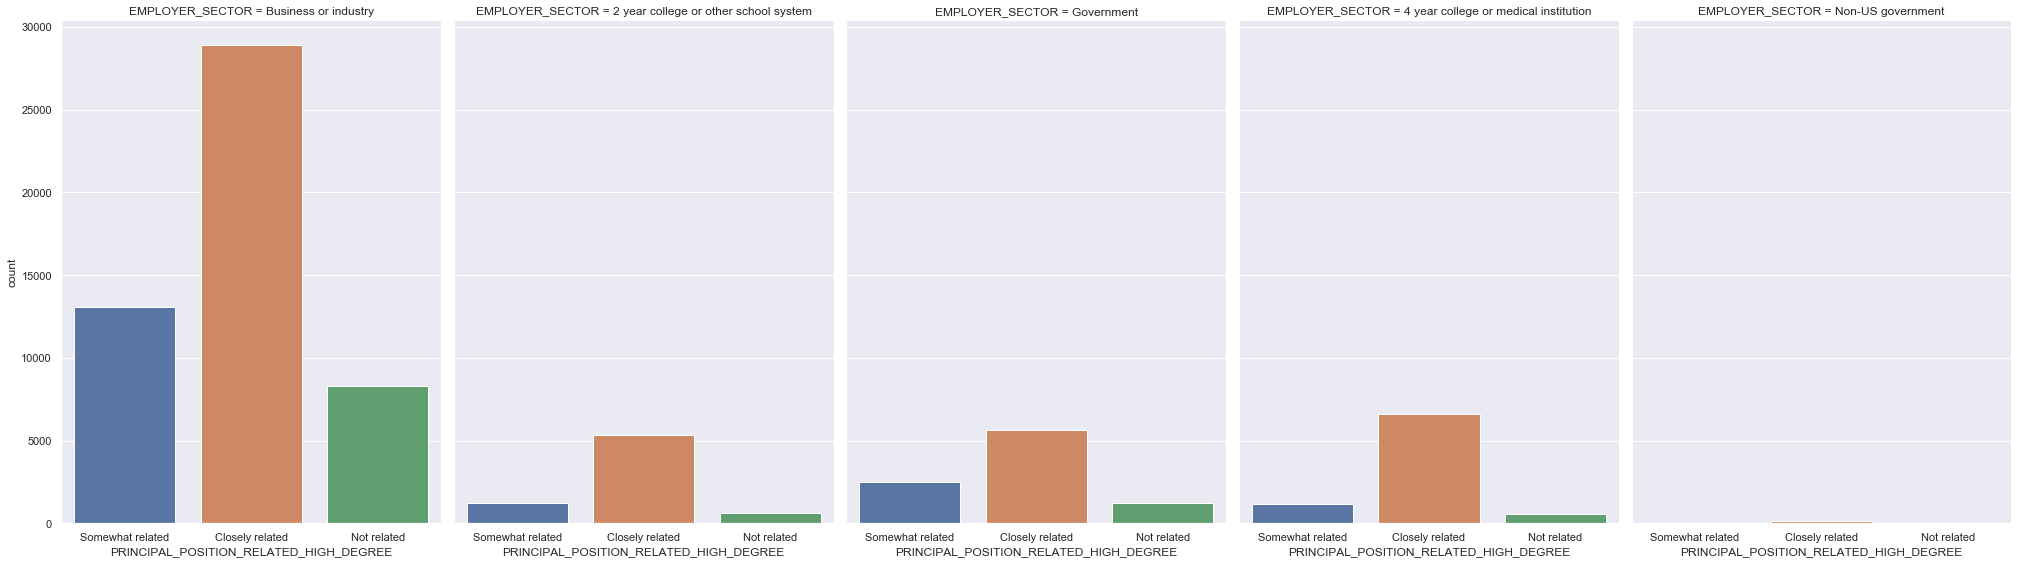

In [2152]:
empsect = sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="EMPLOYER_SECTOR",
               data=working, kind="count",
               height=8, aspect=.7)

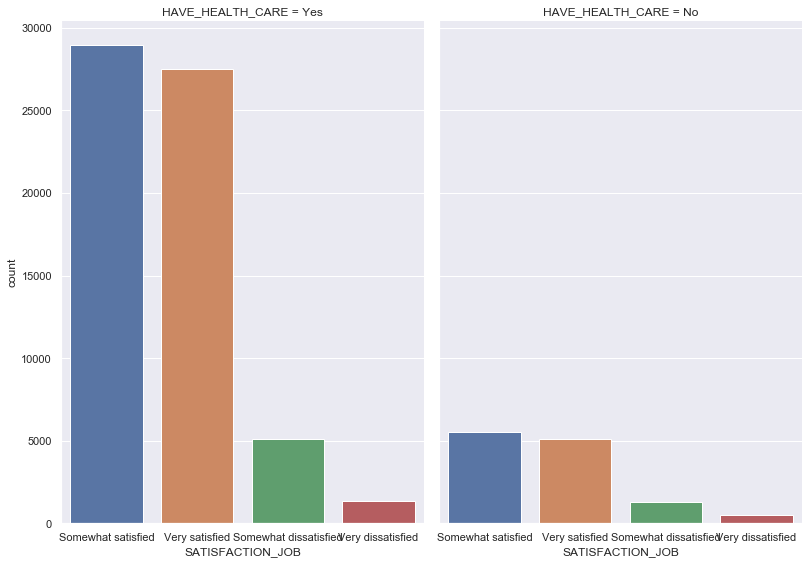

In [2153]:
healthjob = sns.catplot(x="SATISFACTION_JOB", col="HAVE_HEALTH_CARE",
               data=working, kind="count",
               height=8, aspect=.7)

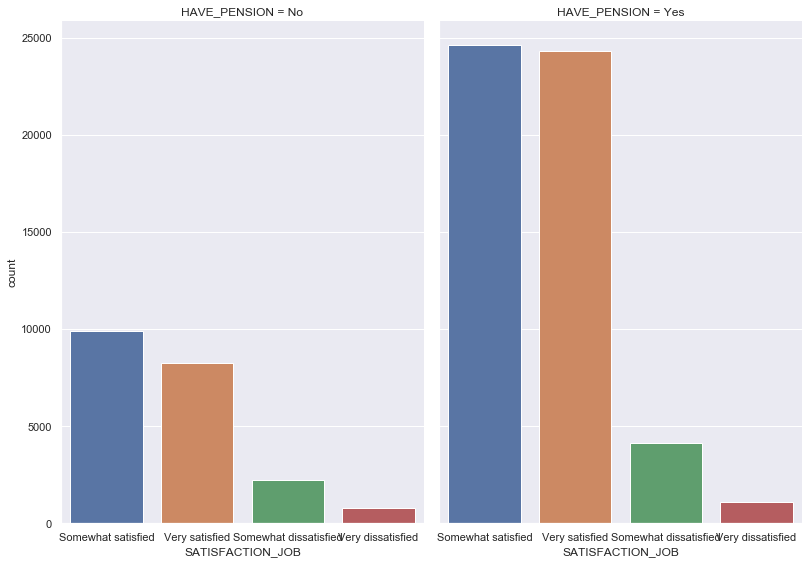

In [2154]:
penjob = sns.catplot(x="SATISFACTION_JOB", col="HAVE_PENSION",
               data=working, kind="count",
               height=8, aspect=.7)

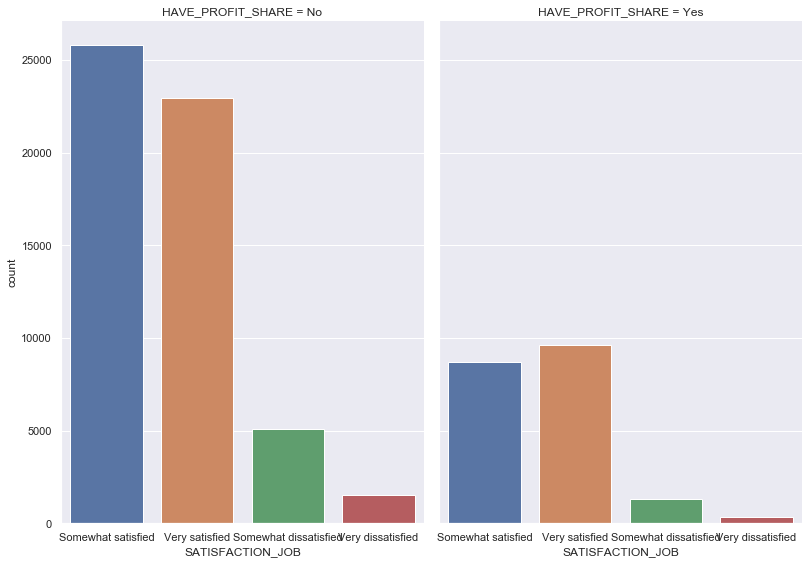

In [2155]:
sharejob = sns.catplot(x="SATISFACTION_JOB", col="HAVE_PROFIT_SHARE",
               data=working, kind="count",
               height=8, aspect=.7)

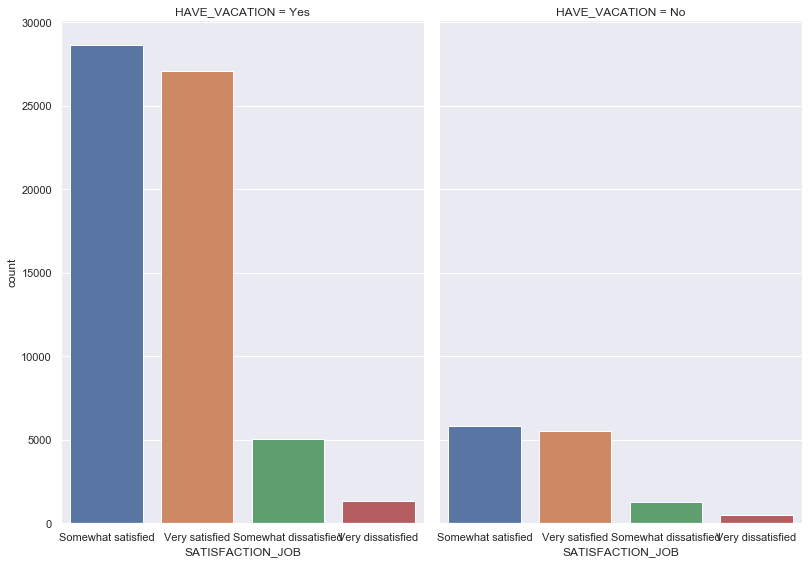

In [2156]:
vacjob = sns.catplot(x="SATISFACTION_JOB", col="HAVE_VACATION",
               data=working, kind="count",
               height=8, aspect=.7)

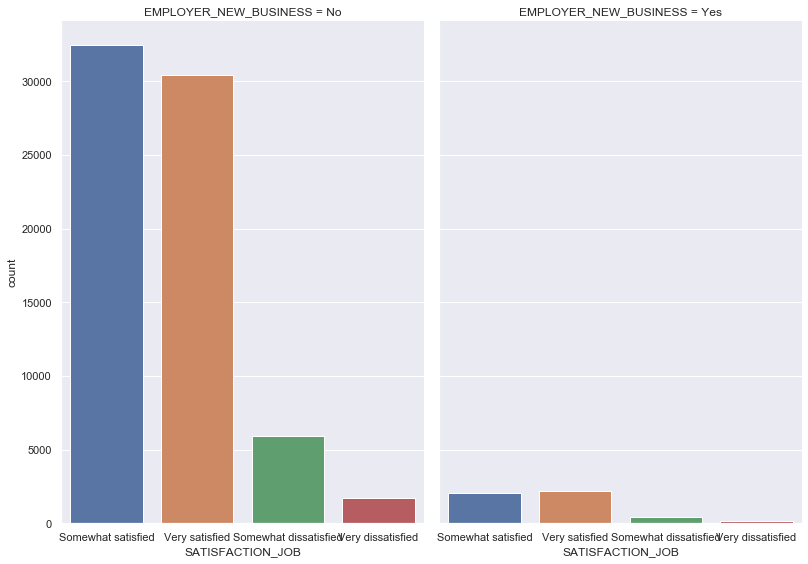

In [2157]:
newbus = sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_NEW_BUSINESS",
               data=working, kind="count",
               height=8, aspect=.7)

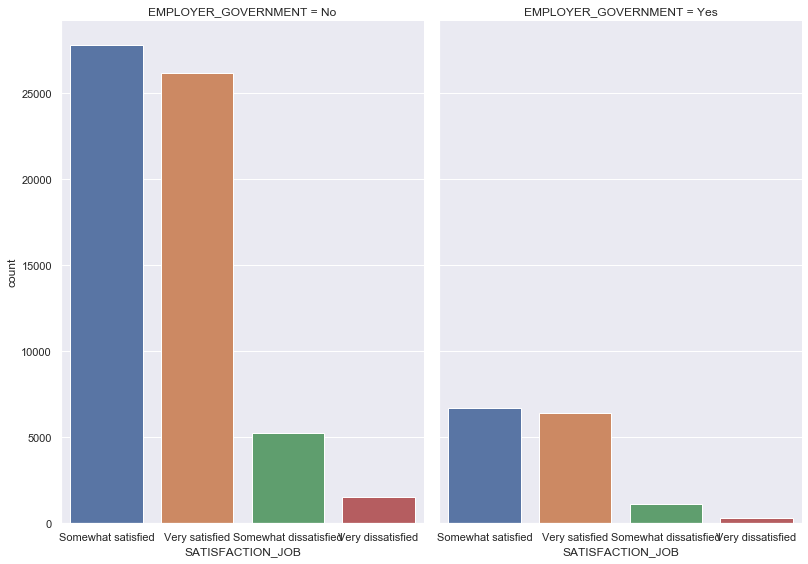

In [2158]:
govbus = sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_GOVERNMENT",
               data=working, kind="count",
               height=8, aspect=.7)

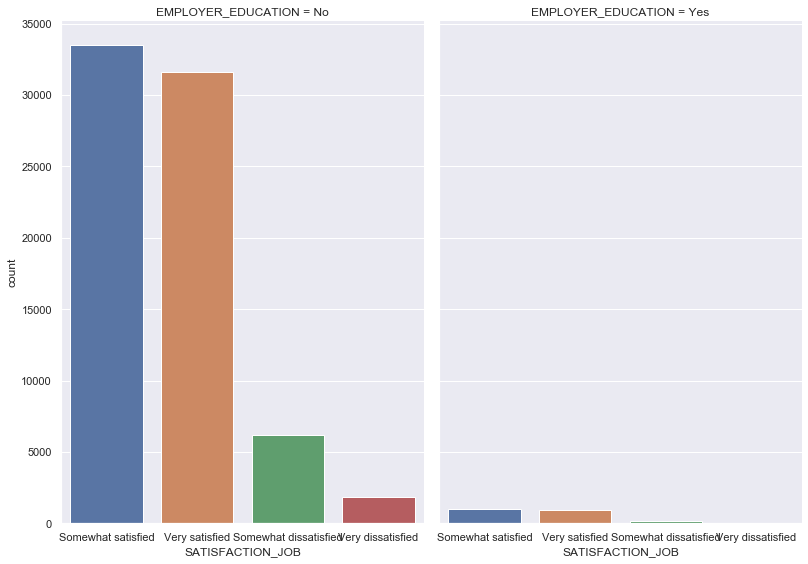

In [2159]:
edubus = sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_EDUCATION",
               data=working, kind="count",
               height=8, aspect=.7)

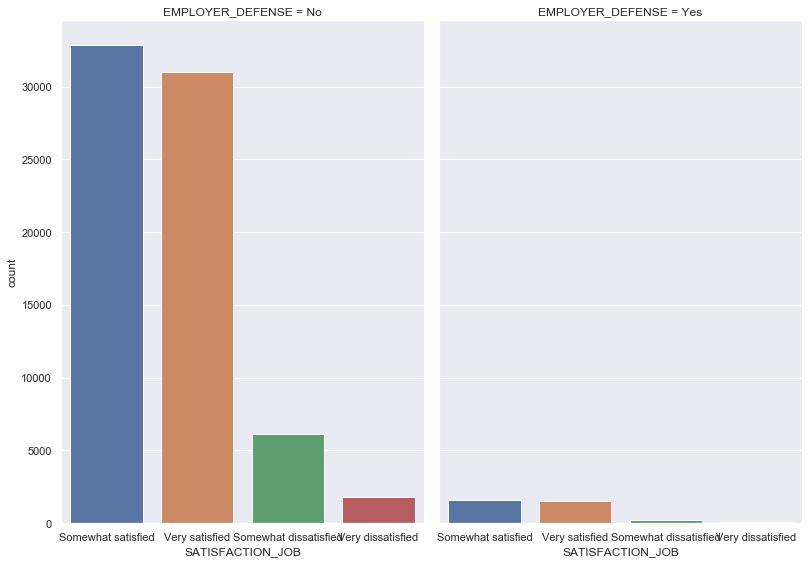

In [2160]:
denbus = sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_DEFENSE",
               data=working, kind="count",
               height=8, aspect=.7)

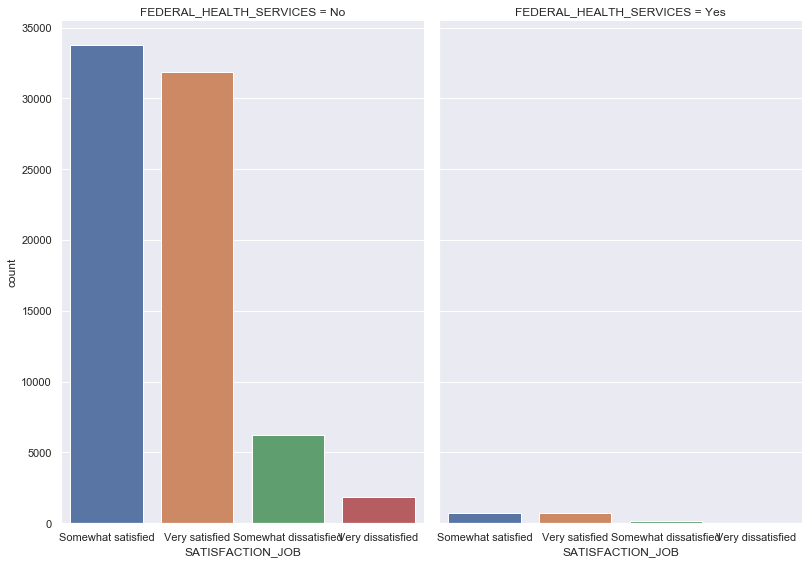

In [2161]:
hbus = sns.catplot(x="SATISFACTION_JOB", col="FEDERAL_HEALTH_SERVICES",
               data=working, kind="count",
               height=8, aspect=.7)

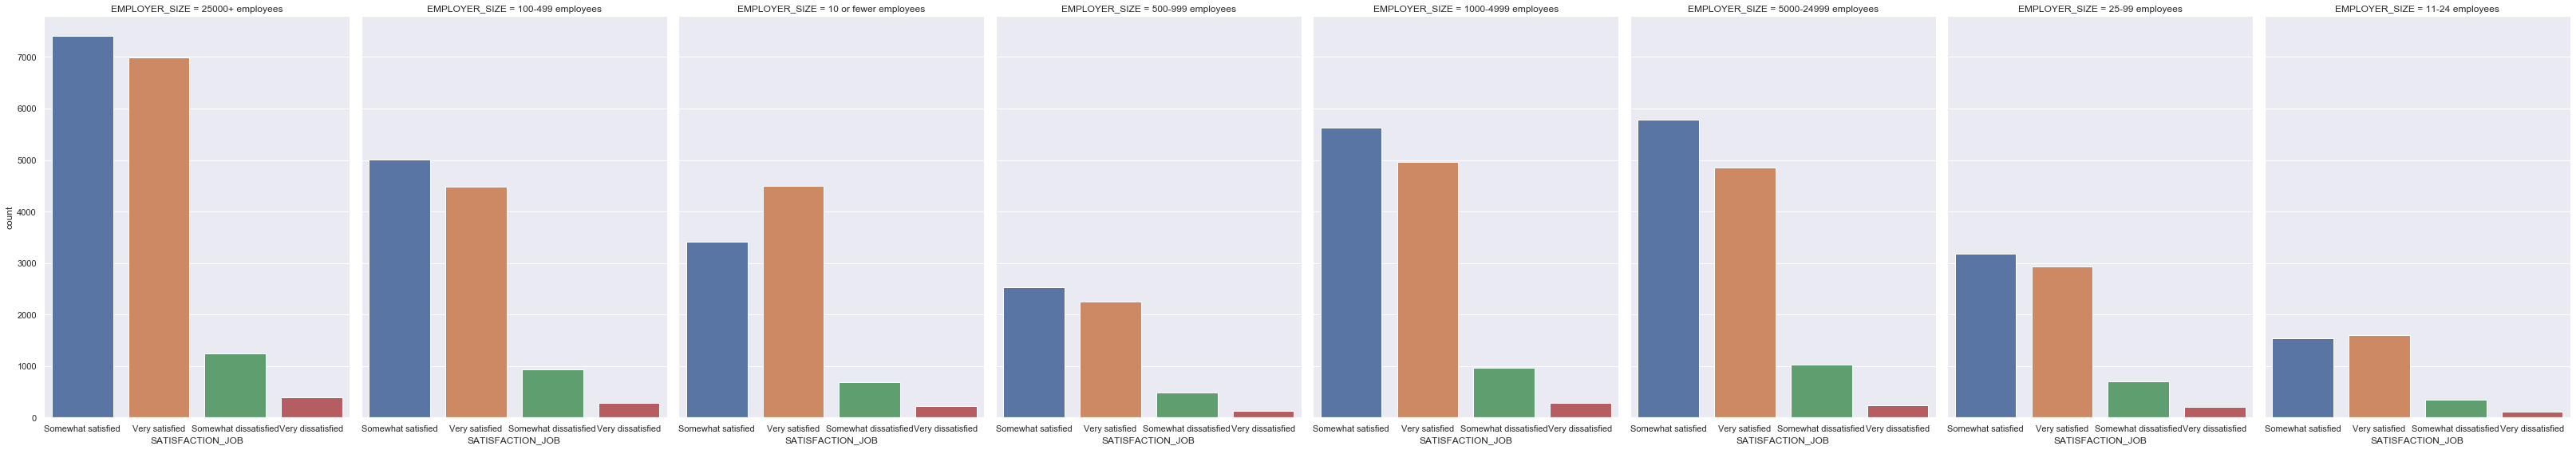

In [2162]:
sizejob = sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_SIZE",
               data=working, kind="count",
               height=8, aspect=.7)

In [2163]:
workingnew = working[['REFID', 'HOURS_WORKED',' SALARY ','HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION','PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
       'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',  'WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON', 'WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON', 'WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE', 'WORK_OUTSIDE_DEGREE_FOR_WORK_COND', 'WORK_OUTSIDE_DEGREE_FOR_FAMILY', 'WORK_OUTSIDE_DEGREE_FOR_LOC', 'WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL', 'WORK_OUTSIDE_DEGREE_FOR_OTHER', 'WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE', 'SATISFACTION_JOB', 'SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS', 'SATISFACTION_JOB_CHALLENGE', 'SATISFACTION_JOB_INDEP', 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY', 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY', 'ATTEND_TRAINING_WORK_RELATE', 'ATTEND_TRAINING', 'ATTEND_TRAINING_CHANGE_FIELD', 'ATTEND_TRAINING_BY_EMPLOYER',
       'ATTEND_TRAINING_CERT', 'ATTEND_TRAINING_INCREASE_ADV_CUR', 'ATTEND_TRAINING_OTHER', 'ATTEND_TRAINING_PERSONAL', 'ATTEND_TRAINING_ACQUIRE_SKILL', 'JOB_REQUIRED_TECH_NATURAL_SCIENCES', 'JOB_REQUIRED_TECH_OTHER', 'JOB_REQUIRED_TECH_SOCIAL_SCIENCES']]

# MAIN DATAFRAME 

In [2164]:
workedu = pd.merge(left=workingnew, right=edudbnew, left_on='REFID', right_on='REFID')

In [2165]:
workedu

,REFID,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
0,500452963,Greater than 40 hours,"$94,000.00",Yes,Yes,No,Yes,Not related,Computer scientists and mathematicians,Computer and mathematical scientists,2 year college or other school system,1000-4999 employees,Professional services,Other,Teaching,Teaching,No,No,No,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,Yes,Yes,Yes,No,No,No,Yes,No,No memberships,No,Working conditions,Job location,Yes,Yes,Yes,Yes,Yes,No,No,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,No,Other,No,No,No,No,No,No,No,No,No,No,Bachelor,NaN,Physical and related sciences,No,No,No,No,No,No,No,No
1,500452978,36 - 40 hours,"$120,000.00",Yes,Yes,No,Yes,Closely related,Other Non-science and engineering occupations,Non-science and engineering occupations,Government,25000+ employees,Professional services,Other,Management and Administration,Management and Administration,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,1 membership,Yes,No,No,No,No,No,No,No,No,No,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,No,Other,No,No,No,No,No,No,No,No,No,Yes,Doctorate,Other non-science and engineering,Non-science and engineering fields,No,No,No,No,No,No,No,No
2,500453007,Greater than 40 hours,"$146,000.00",Yes,Yes,No,Yes,Closely related,science and engineering managers,Science and engineering related occupations,Government,1000-4999 employees,Management and Administration,Management and Administration,Employee relations,Management and Administration,No,No,Yes,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No memberships,Yes,No,No,No,No,No,No,No,No,No,Somewhat dissatisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Yes,To facilitate a change in occupation field,No,No,Yes,No,No,No,Yes,Yes,No,No,Master,Management and administration,Non-science and e

In [2166]:
alldata = pd.merge(left=perdata, right=workedu, left_on='REFID', right_on='REFID')

In [2167]:
alldata.sample(5)

,REFID,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
50648,E11718103,60,Male,No,White,United States,Yes,Born in US or US territories,None,36 - 40 hours,"$105,000.00",Yes,Yes,Yes,Yes,Closely related,Civil engineers,Engineers,Business or industry,25000+ employees,Basic research,Research and Development,Applied research,Research and Development,No,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,Yes,Yes,Yes,No,3 memberships,Yes,No,No,No,No,No,No,No,No,No,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Yes,To facilitate a change in occupation field,No,No,Yes,No,No,No,Yes,Yes,No,No,Master,Civil engineering,Engineering,No,No,No,No,No,No,No,No
28126,E11250008,27,Female,Yes,Under-represented minorities,United States,Yes,Born in US or US territories,None,36 - 40 hours,"$68,000.00",Yes,Yes,No,Yes,Somewhat related,Health-related occupations,Science and engineering related occupations,4 year college or medical institution,1000-4999 employees,Professional services,Other,Teaching,Teaching,No,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,3 memberships,Yes,No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Very satisfied,Somewhat dissatisfied,Very dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Yes,To facilitate a change in occupation field,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Bachelor,Health-related fields,Science and engineering-related fields,Yes,No,Yes,Yes,No,Yes,No,Yes
42291,E11549813,23,Female,No,White,Not in the US,No,None,None,20 or less,"$7,000.00",Yes,No,No,No,Closely related,Economists,Social and related scientists,4 year college or medical institution,5000-24999 employees,Applied research,Research and Development,Other work activity,Other,No,No,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,1 membership,Yes,No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewh

In [2168]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62373 entries, 0 to 62372
Data columns (total 90 columns):
REFID                                      62373 non-null object
AGE                                        62373 non-null int64
GENDER                                     62373 non-null object
MINORITY                                   62373 non-null object
RACE                                       62373 non-null object
BIRTH_PLACE                                62373 non-null object
US_CITIZENSHIP                             62373 non-null object
US_CITIZEN_TYPE                            62373 non-null object
TOTAL_CHILDREN                             62373 non-null object
HOURS_WORKED                               62373 non-null object
 SALARY                                    62373 non-null object
HAVE_HEALTH_CARE                           62373 non-null object
HAVE_PENSION                               62373 non-null object
HAVE_PROFIT_SHARE                          6237

In [2169]:
alldata.shape

(62373, 90)

In [2170]:
alldata.columns

Index(['REFID', 'AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN', 'HOURS_WORKED', ' SALARY ', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION', 'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',
       'WORK_OUTSIDE_DEGREE_FOR_FIRS

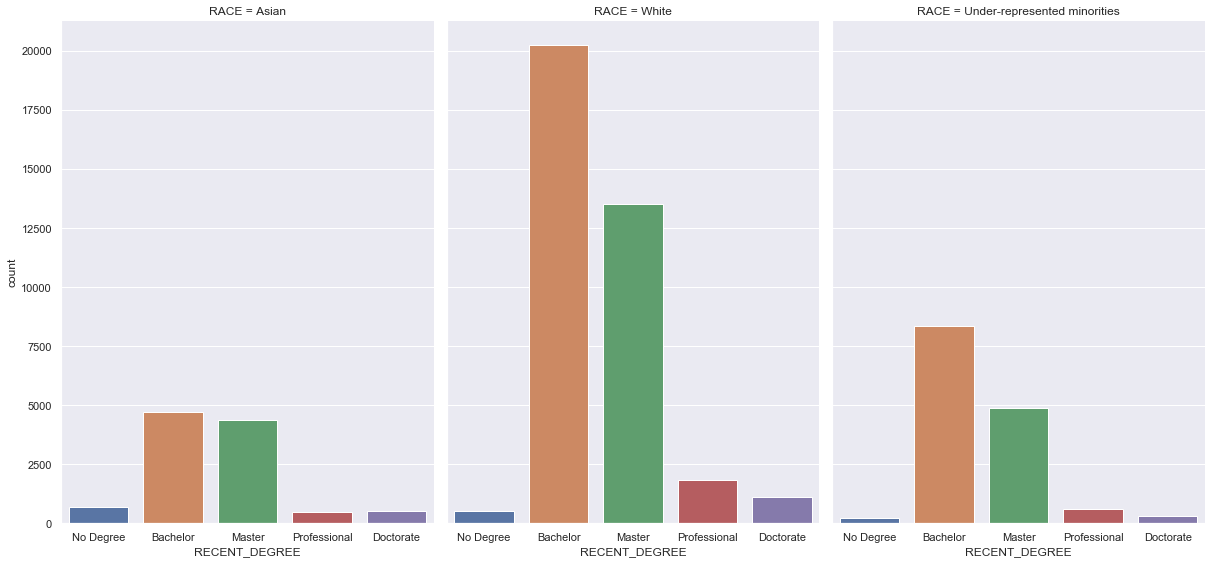

In [2171]:
raceedu = sns.catplot(x="RECENT_DEGREE", col="RACE",
               data=alldata, kind="count",
               height=8, aspect=.7)

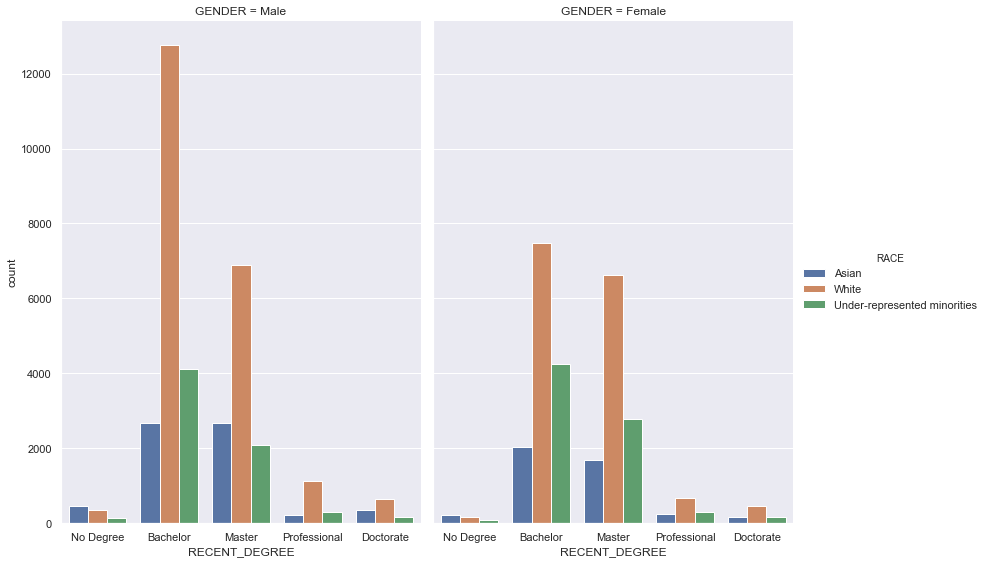

In [2172]:
degreegen = sns.catplot(x="RECENT_DEGREE", col="GENDER", hue = "RACE",
               data=alldata, kind="count",
               height=8, aspect=.7)

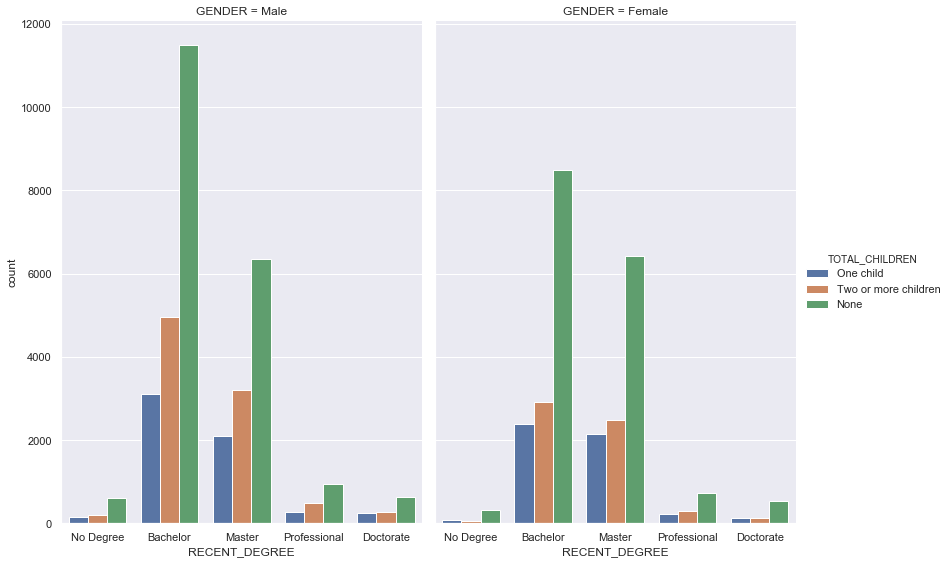

In [2173]:
degreekids = sns.catplot(x="RECENT_DEGREE", col="GENDER", hue = "TOTAL_CHILDREN",
               data=alldata, kind="count",
               height=8, aspect=.7)

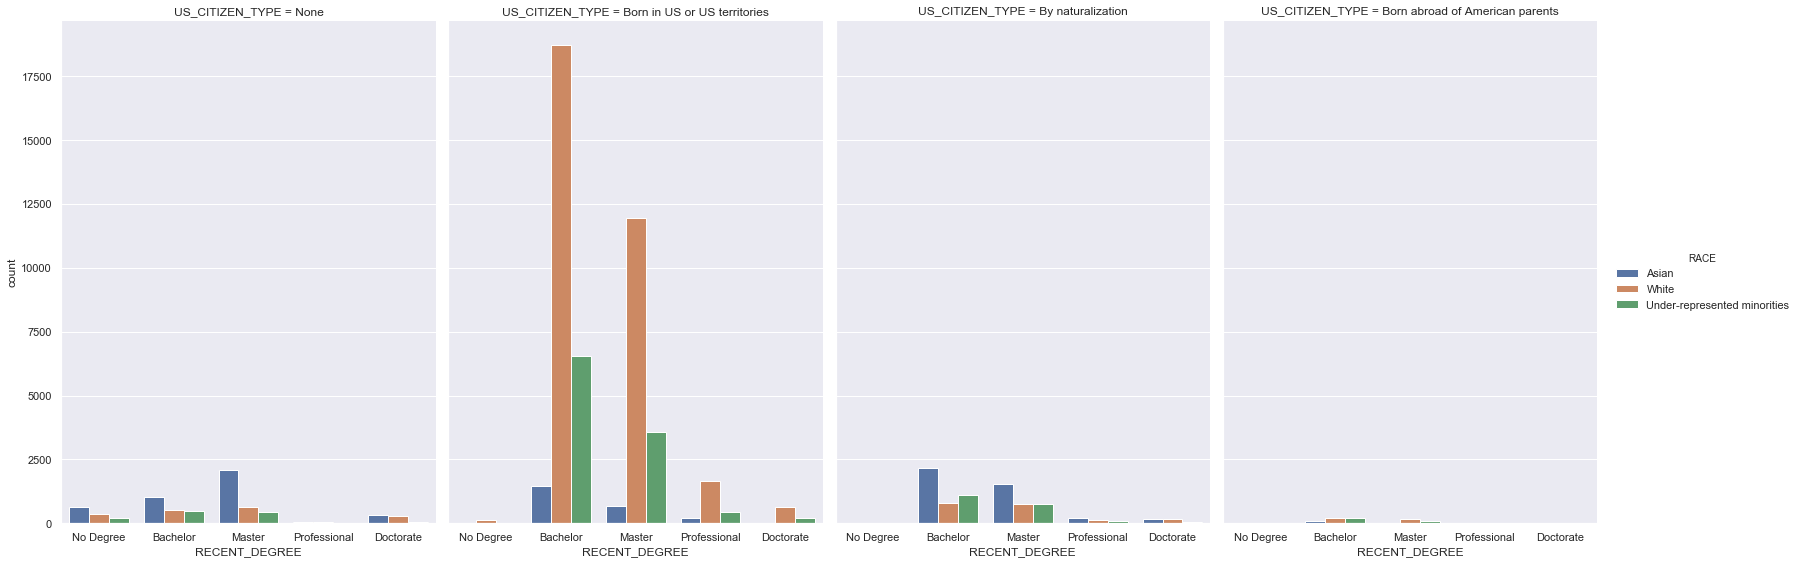

In [2174]:
typeedu = sns.catplot(x="RECENT_DEGREE", col="US_CITIZEN_TYPE", hue = "RACE",
               data=alldata, kind="count",
               height=8, aspect=.7)

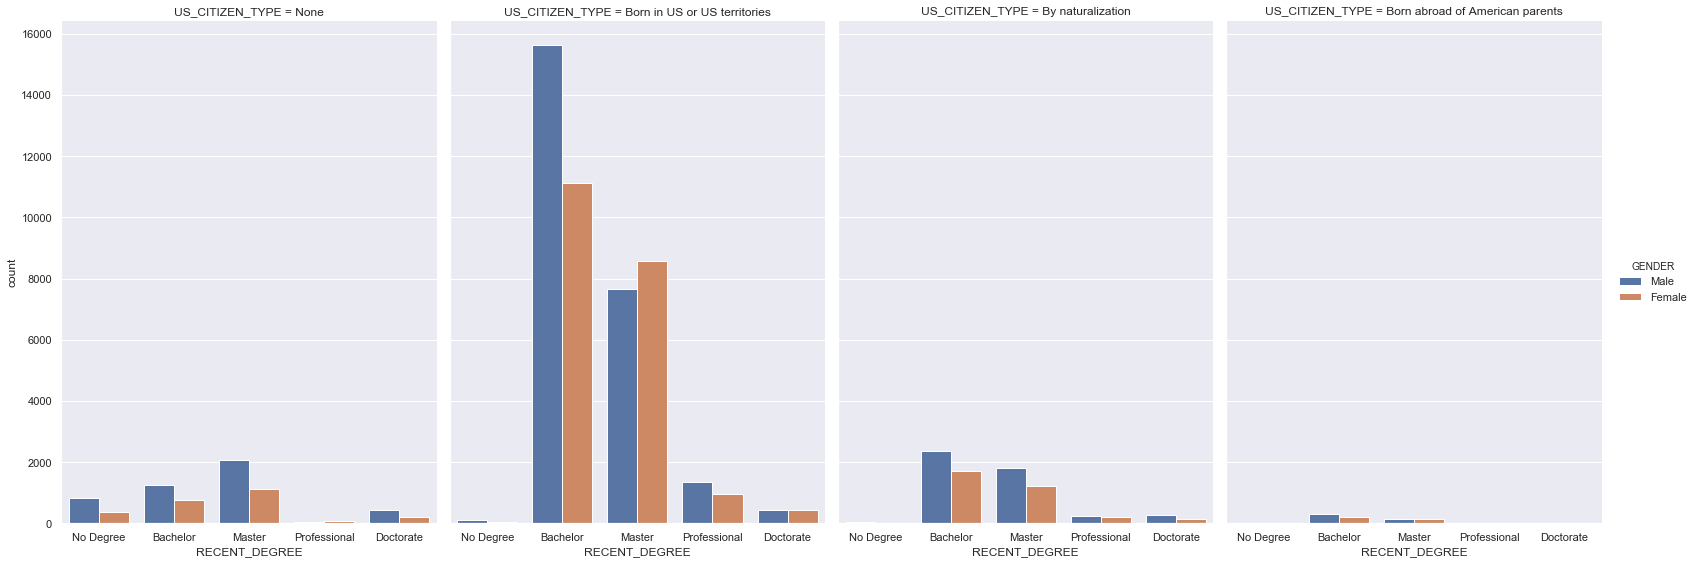

In [2175]:
genderedu = sns.catplot(x="RECENT_DEGREE", col="US_CITIZEN_TYPE", hue = "GENDER",
               data=alldata, kind="count",
               height=8, aspect=.7)

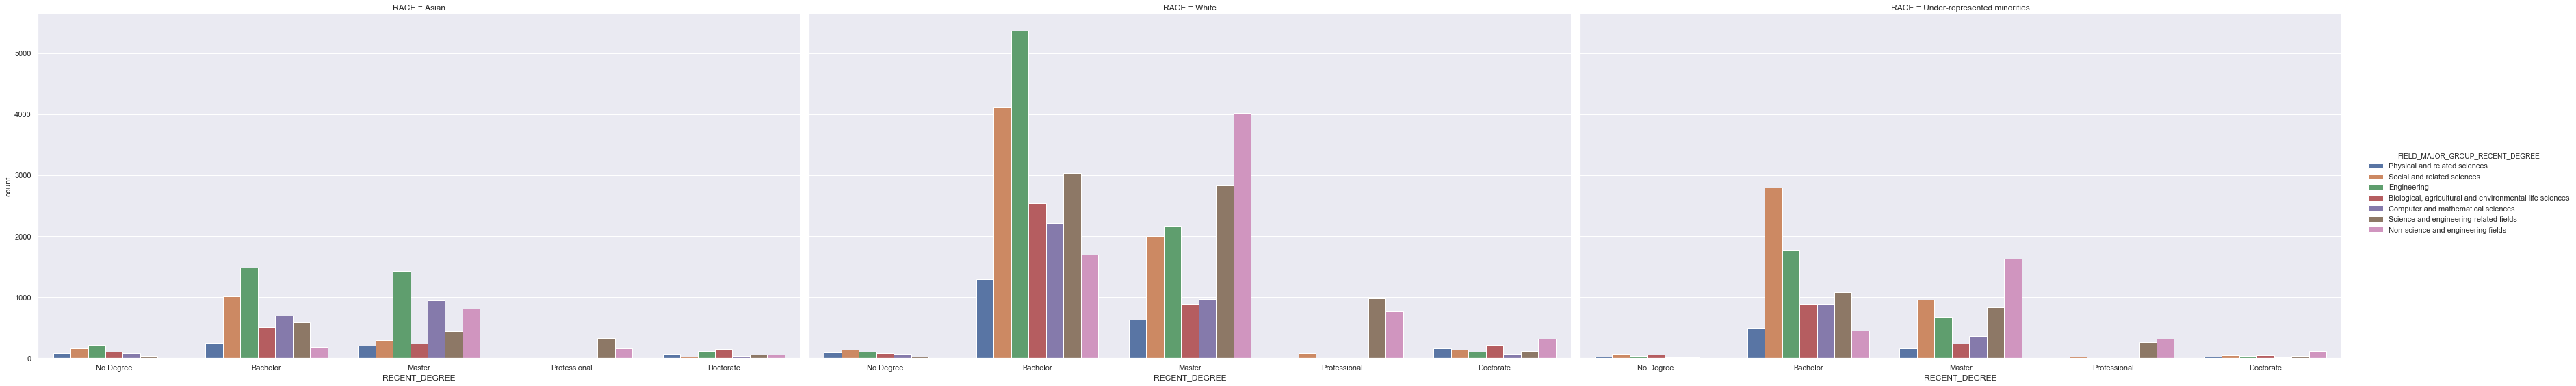

In [2176]:
racedegreemajor = sns.catplot(x="RECENT_DEGREE", col = "RACE", hue = "FIELD_MAJOR_GROUP_RECENT_DEGREE",
               data=alldata, kind="count",
               height=8, aspect=2)

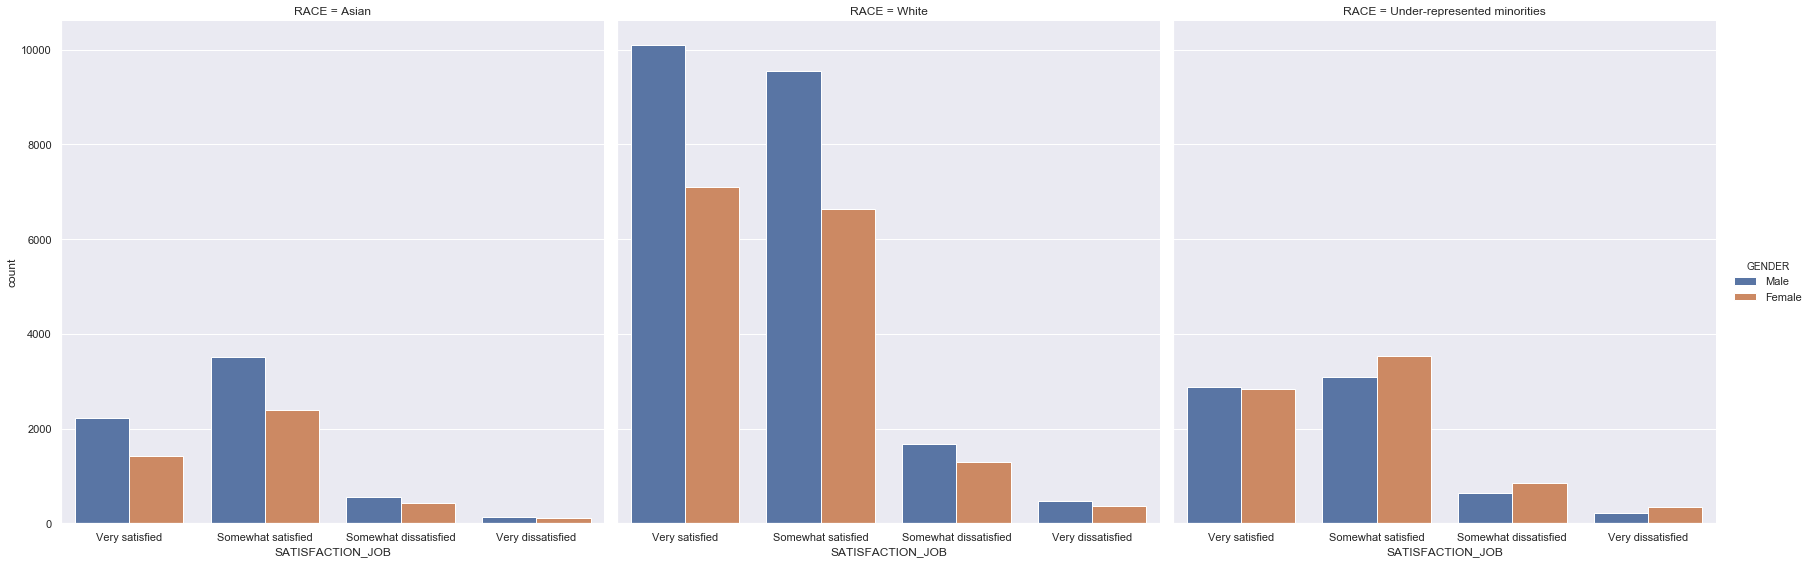

In [2177]:
jobracestat = sns.catplot(x="SATISFACTION_JOB",  col= "RACE", hue = "GENDER",
               data=alldata, kind="count",
               height=8, aspect=1)

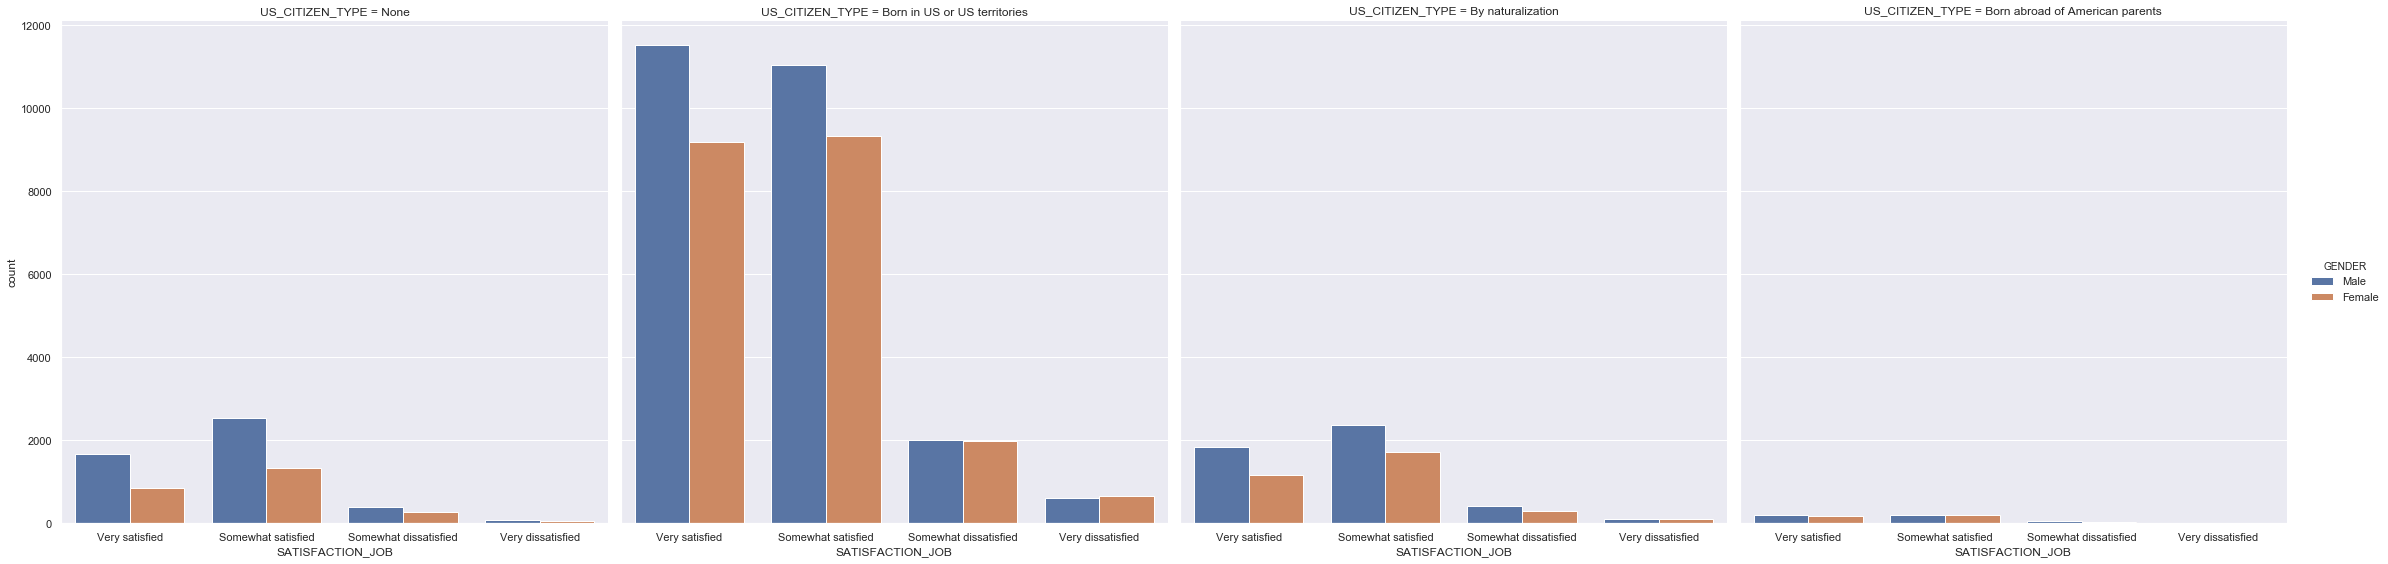

In [2178]:
typejobracestat = sns.catplot(x="SATISFACTION_JOB",  col= "US_CITIZEN_TYPE", hue = "GENDER",
               data=alldata, kind="count",
               height=8, aspect=1)

In [2179]:
alldata.columns

Index(['REFID', 'AGE', 'GENDER', 'MINORITY', 'RACE', 'BIRTH_PLACE', 'US_CITIZENSHIP', 'US_CITIZEN_TYPE', 'TOTAL_CHILDREN', 'HOURS_WORKED', ' SALARY ', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION', 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE', 'PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP', 'EMPLOYER_SECTOR', 'EMPLOYER_SIZE', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION', 'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET',
       'WORK_OUTSIDE_DEGREE_FOR_FIRS

In [2180]:
heart = alldata[['REFID','HOURS_WORKED', 'HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION','PRINCIPAL_POSITION', 'PRINCIPAL_MAJOR_GROUP','WORK_ACTIVITY', 'WORK_ACTIVITY_SUM', 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER', 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT', 'RESEARCH_DEVE_TEACHING', 'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING', 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS', 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION', 'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING', 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE', 'WORK_APPLIED_RESEARCH', 'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS', 'SUPERVISORY_WORK','WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON', 'WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON',  'SATISFACTION_JOB', 'SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS', 'SATISFACTION_JOB_CHALLENGE', 'SATISFACTION_JOB_INDEP', 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY', 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY', 'JOB_REQUIRED_TECH_NATURAL_SCIENCES', 'JOB_REQUIRED_TECH_OTHER', 'JOB_REQUIRED_TECH_SOCIAL_SCIENCES', 'RECENT_DEGREE',
       'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE']]

In [ ]:
workoutstat = sns.catplot(x="SATISFACTION_JOB",  col= "WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON", hue = "RECENT_DEGREE",
               data=alldata, kind="count",
               height=12, aspect=1)

In [ ]:
workoutstat2 = sns.catplot(x="SATISFACTION_JOB",  col= "WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON", hue = "RECENT_DEGREE",
               data=alldata, kind="count",
               height=12, aspect=1)

In [ ]:
penjobracestat = sns.catplot(x="SATISFACTION_JOB",  col= "HAVE_HEALTH_CARE", hue = "TOTAL_CHILDREN",
               data=alldata, kind="count",
               height=8, aspect=1)

In [ ]:
typejobracestat = sns.catplot(x="SATISFACTION_JOB",  col= "HAVE_PENSION", hue = "TOTAL_CHILDREN",
               data=alldata, kind="count",
               height=8, aspect=1)

In [ ]:
vacjobracestat = sns.catplot(x="SATISFACTION_JOB",  col= "HAVE_VACATION", hue = "TOTAL_CHILDREN",
               data=alldata, kind="count",
               height=8, aspect=1)

In [ ]:
heart.head(2)

# Random Forest

In [ ]:
heartsatisfaction = heart[['HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION','SATISFACTION_JOB','SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS', 'SATISFACTION_JOB_CHALLENGE', 'SATISFACTION_JOB_INDEP', 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY', 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY']]

In [ ]:
heartsatisfaction.columns

In [ ]:
X = heartsatisfaction[['HAVE_HEALTH_CARE', 'HAVE_PENSION', 'HAVE_PROFIT_SHARE', 'HAVE_VACATION']]
y = heartsatisfaction['SATISFACTION_JOB']